In [ ]:
from google.colab import files
files.upload()  # Sube kaggle.json

Saving kaggle.json to kaggle (7).json


{'kaggle (7).json': b'{"username":"richardvelez","key":"ae423491c369383357b9e89d66a7aa71"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **Se carga el dataset**

In [ ]:
!kaggle datasets download -d hafiznouman786/annotated-dataset-for-knee-arthritis-detection
!unzip -n annotated-dataset-for-knee-arthritis-detection.zip -d arthritis_dataset

Dataset URL: https://www.kaggle.com/datasets/hafiznouman786/annotated-dataset-for-knee-arthritis-detection
License(s): CC0-1.0
annotated-dataset-for-knee-arthritis-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  annotated-dataset-for-knee-arthritis-detection.zip


In [ ]:
import os

path = "arthritis_dataset"
print("Contenido base:", os.listdir(path))

train_path = os.path.join(path, "Training")
print("Contenido de Training:", os.listdir(train_path))

Contenido base: ['Training']
Contenido de Training: ['1Doubtful', '0Normal', '2Mild', '3Moderate', '4Severe']


# **Se construye un DataFrame con el nombre de la clase (Category), el nombre del archivo (Filename) y su ruta completa (Filepath).**

In [ ]:
#!pip install --upgrade numpy scikit-learn --force-reinstall

  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.3 MB/s eta 0:00:00
Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
  Attempting uninstall: joblib
    Found existing installation: jo

In [ ]:
import pandas as pd

# Rutas base
path = "arthritis_dataset"
train_path = os.path.join(path, "Training")
categories = os.listdir(train_path)

# Recolectar los datos
data = []

for category in categories:
    category_path = os.path.join(train_path, category)
    for filename in os.listdir(category_path):
        data.append({
            'Category': category,
            'Filename': filename,
            'Filepath': os.path.join(category_path, filename)
        })

# Crear DataFrame
df = pd.DataFrame(data)

# Codificar la etiqueta (0 a 4)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Encoded_Category'] = label_encoder.fit_transform(df['Category'])

# Mostrar resultado
print(df.head())
print(df['Category'].value_counts())


    Category              Filename  \
0  1Doubtful   DoubtfulG1 (44).png   
1  1Doubtful  DoubtfulG1 (273).png   
2  1Doubtful  DoubtfulG1 (196).png   
3  1Doubtful   DoubtfulG1 (79).png   
4  1Doubtful  DoubtfulG1 (203).png   

                                            Filepath  Encoded_Category  
0  arthritis_dataset/Training/1Doubtful/DoubtfulG...                 1  
1  arthritis_dataset/Training/1Doubtful/DoubtfulG...                 1  
2  arthritis_dataset/Training/1Doubtful/DoubtfulG...                 1  
3  arthritis_dataset/Training/1Doubtful/DoubtfulG...                 1  
4  arthritis_dataset/Training/1Doubtful/DoubtfulG...                 1  
Category
0Normal      514
1Doubtful    477
2Mild        232
3Moderate    221
4Severe      206
Name: count, dtype: int64


Esto se hace para tener una estructura tabular clara y flexible que centraliza la información del dataset, facilitando todas las tareas posteriores de análisis, limpieza, división y carga de imágenes.

Se transformaron las clases categóricas (0Normal, 1Doubtful, etc.) a valores numéricos del 0 al 4.



# **Se hizo un análisis estadístico y gráfico del número de imágenes por clase y su porcentaje sobre el total.**

/tmp/ipython-input-6-1388951708.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


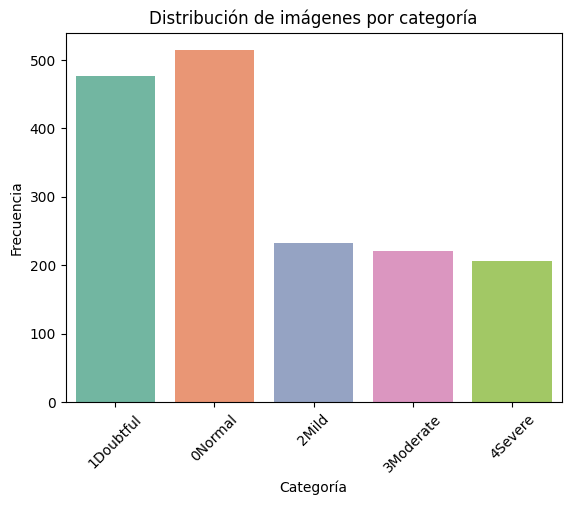

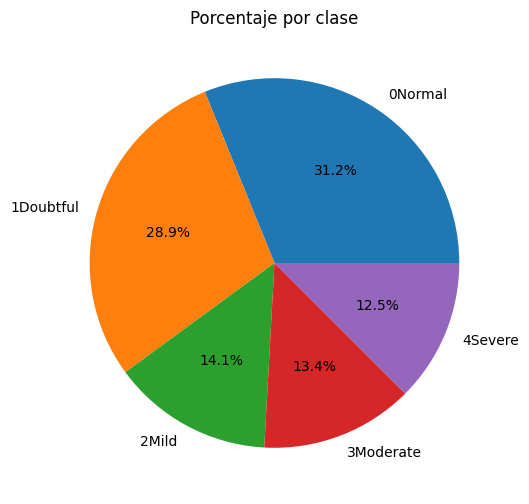

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de clases
sns.countplot(data=df, x='Category', palette='Set2')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de imágenes por categoría')
plt.xticks(rotation=45)
plt.show()

# Distribución porcentual
df['Category'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Porcentaje por clase')
plt.ylabel('')
plt.show()


Detectamos un desequilibrio entre clases: las categorías 0Normal y 1Doubtful están sobrerrepresentadas, mientras que las clases 3Moderate y 4Severe tienen menor cantidad de muestras.



# **Limpieza y verificación**

In [ ]:
import imghdr

corrupt_files = []
for path in df['Filepath']:
    if imghdr.what(path) is None:
        corrupt_files.append(path)

print(f"Imágenes corruptas encontradas: {len(corrupt_files)}")

/tmp/ipython-input-7-322140346.py:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Imágenes corruptas encontradas: 0


Verificamos duplicados por nombre de imagen (para este dataset no hay)

In [ ]:
print("Duplicados por nombre:", df.duplicated(subset='Filename').sum())

Duplicados por nombre: 0


# **División del dataset en train/val/test**

# Selección de variables clave

Se usa la columna 'Filepath' para cargar imágenes.

Se usa 'Encoded_Category' como etiqueta.

In [ ]:
from sklearn.model_selection import train_test_split

# Paso 1: Separar 10% para test
train_val_df, test_df = train_test_split(
    df, test_size=0.10, stratify=df['Encoded_Category'], random_state=42
)

# Paso 2: Separar 20/90 restantes para validación (20% de 90% ≈ 22.2% del total)
val_size = 2 / 9  # para que val sea 20% del total original

train_df, val_df = train_test_split(
    train_val_df, test_size=val_size, stratify=train_val_df['Encoded_Category'], random_state=42
)

# Verifica los tamaños
print(f"Train size: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
print(f"Validation size: {len(val_df)} ({len(val_df)/len(df)*100:.1f}%)")
print(f"Test size: {len(test_df)} ({len(test_df)/len(df)*100:.1f}%)")


Train size: 1155 (70.0%)
Validation size: 330 (20.0%)
Test size: 165 (10.0%)


Para asegurar una evaluación objetiva y un entrenamiento robusto del modelo, se optó por una división del dataset en 70% para entrenamiento, 20% para validación y 10% para prueba, manteniendo la distribución proporcional de las clases (estratificación). Esta configuración permite ajustar los hiperparámetros y prevenir sobreajuste sin utilizar el conjunto de prueba hasta la evaluación final."

In [ ]:
!pip install tensorflow
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 115.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.6 requires scipy<1.16.0,>=1.8.0, but you have scipy 1.16.0 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
df['Category'].value_counts()

Category
0Normal      514
1Doubtful    477
2Mild        232
3Moderate    221
4Severe      206
Name: count, dtype: int64

# **Carga de imágenes y data augmentation (solo para entrenamiento)**


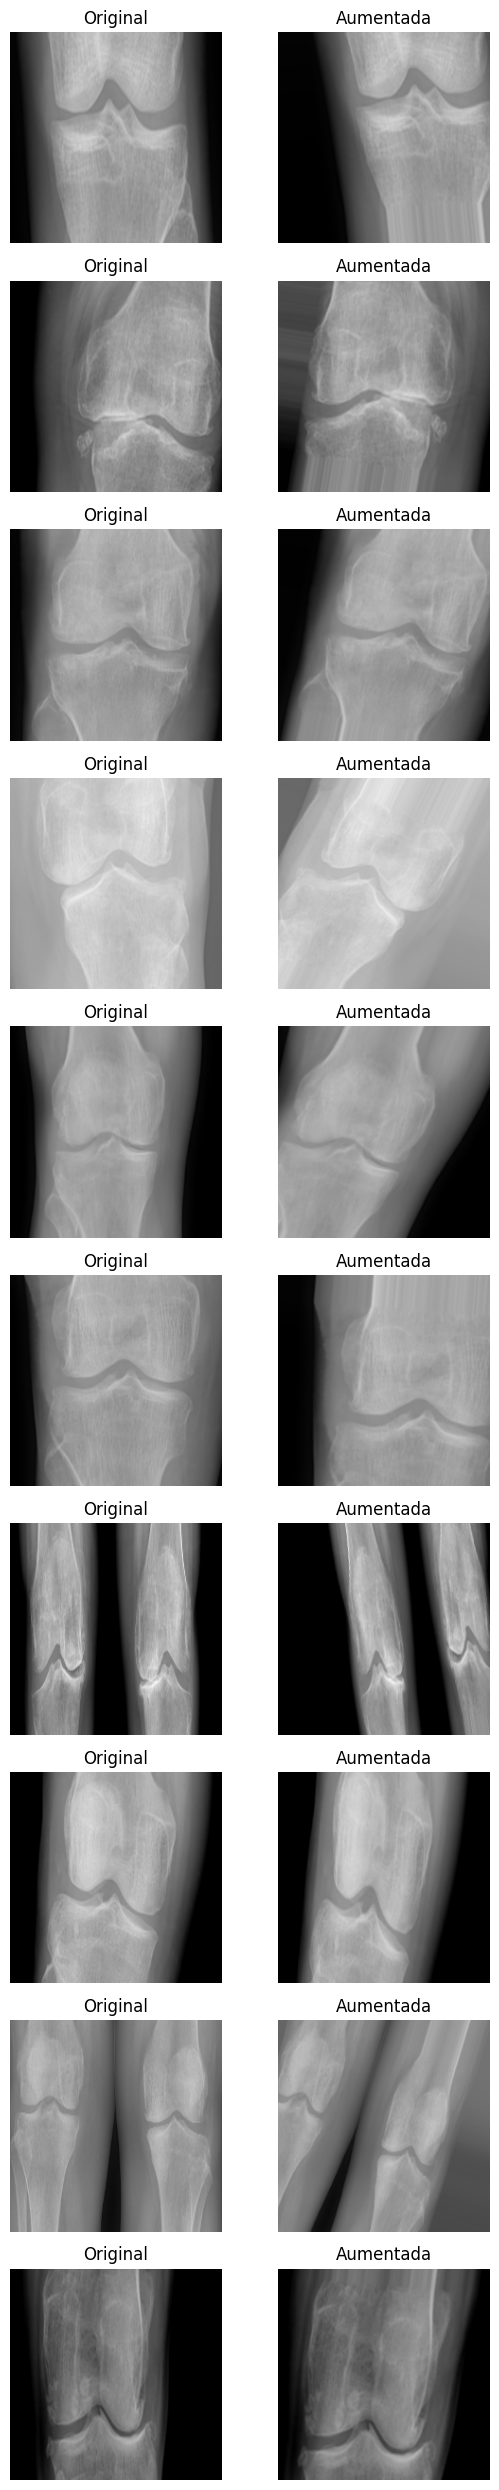

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

# Configuración
TARGET_PER_CLASS = 800
IMG_SIZE = (224, 224)

# Generador sin normalización, solo para visualizar
raw_augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Función para cargar imagen sin preprocesar (para aplicar augmentation correctamente)
def load_raw_image(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, IMG_SIZE)
    return img.astype(np.uint8)

# Diccionario por clase
class_to_df = {label: train_df[train_df['Category'] == label] for label in train_df['Category'].unique()}

# Datos aumentados
augmented_images = []
augmented_labels = []

# Visualización (almacenar originales y augmentadas)
originals_to_plot = []
augmenteds_to_plot = []

# Generar datos aumentados clase por clase
for label, subset_df in class_to_df.items():
    imgs = [load_raw_image(fp) for fp in subset_df['Filepath']]
    lbls = [subset_df.iloc[0]['Encoded_Category']] * len(imgs)

    augmented_images.extend(imgs)
    augmented_labels.extend(lbls)

    # ¿Cuántas faltan?
    needed = TARGET_PER_CLASS - len(imgs)
    if needed > 0:
        reps = int(np.ceil(needed / len(imgs)))

        img_array = np.array(imgs)
        label_array = np.array(lbls)

        gen = raw_augmentor.flow(img_array, label_array, batch_size=1, shuffle=False)
        for _ in range(needed):
            aug_img, aug_lbl = next(gen)
            augmented_images.append(aug_img[0].astype(np.uint8))
            augmented_labels.append(aug_lbl[0])


# Visualizar 10 comparaciones original vs augmentada (corregido)
originals_to_plot = []
augmenteds_to_plot = []

for i in range(10):
    idx = np.random.randint(0, len(train_df))
    original = load_raw_image(train_df.iloc[idx]['Filepath'])
    label = train_df.iloc[idx]['Encoded_Category']

    gen = raw_augmentor.flow(np.expand_dims(original, axis=0), np.array([label]), batch_size=1)
    augmented = next(gen)[0].squeeze().astype(np.uint8)



    originals_to_plot.append(original)
    augmenteds_to_plot.append(augmented)

# Mostrar imágenes originales y aumentadas
fig, axs = plt.subplots(10, 2, figsize=(6, 25))
for i in range(10):
    axs[i, 0].imshow(originals_to_plot[i])
    axs[i, 0].set_title("Original")
    axs[i, 0].axis("off")

    axs[i, 1].imshow(augmenteds_to_plot[i])
    axs[i, 1].set_title("Aumentada")
    axs[i, 1].axis("off")

plt.tight_layout()
plt.show()

from sklearn.utils import shuffle

#Mezcla final del dataset augmentado (solo entrenamiento)

train_images_raw, train_labels_raw = shuffle(
    np.array(augmented_images),
    np.array(augmented_labels),
    random_state=42
)



In [ ]:
import pandas as pd

# Crear DataFrame auxiliar
df_temp = pd.DataFrame({'Encoded_Category': train_labels_raw})
df_temp['Category'] = label_encoder.inverse_transform(df_temp['Encoded_Category'])

# Mostrar conteo con el mismo formato que df['Category'].value_counts()
df_temp['Category'].value_counts().to_frame(name='count')

count
Category        
3Moderate    800
2Mild        800
4Severe      800
0Normal      800
1Doubtful    800

# **Carga de imágenes reales para validación y test (sin augmentation) y redimensionamiento, normalización de imágenes**

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import cv2

IMG_SIZE = (224, 224)

# Función para cargar imagen y normalizarla (sin augmentation)
def load_and_preprocess(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, IMG_SIZE)
    img = img.astype(np.float32)
    return preprocess_input(img)

# Entrenamiento: augmentado y mezclado en estas variables
# train_images_raw, train_labels_raw

X_train = preprocess_input(train_images_raw.astype(np.float32))
y_train = train_labels_raw

# Validación (solo imágenes originales, sin augmentation)
X_val = np.array([load_and_preprocess(fp) for fp in val_df['Filepath']])
y_val = np.array(val_df['Encoded_Category'])

# Test (solo imágenes originales, sin augmentation)
X_test = np.array([load_and_preprocess(fp) for fp in test_df['Filepath']])
y_test = np.array(test_df['Encoded_Category'])

# Confirmación de tamaños
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")


X_train: (4000, 224, 224, 3), y_train: (4000,)
X_val:   (330, 224, 224, 3), y_val:   (330,)
X_test:  (165, 224, 224, 3), y_test:  (165,)


# **Resnet50**

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 139ms/step - accuracy: 0.2649 - loss: 1.8889 - val_accuracy: 0.5788 - val_loss: 1.0420
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.4522 - loss: 1.3036 - val_accuracy: 0.5970 - val_loss: 0.9752
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.5198 - loss: 1.1401 - val_accuracy: 0.6424 - val_loss: 0.9089
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.5513 - loss: 1.0789 - val_accuracy: 0.6394 - val_loss: 0.8825
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.5787 - loss: 1.0224 - val_accuracy: 0.6758 - val_loss: 0.8607
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.5956 - loss: 0.9741 - val_accuracy: 0.6667 - val_loss: 0.8226
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.5953 - loss: 0.9574 - val_accuracy: 0.6909 - val_loss: 0.8168
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━

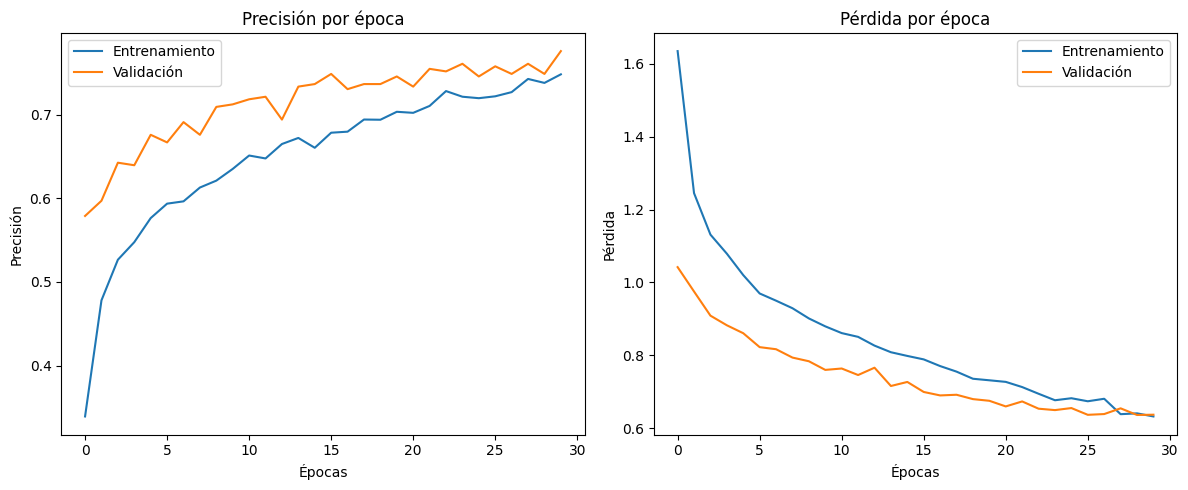

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 907ms/step


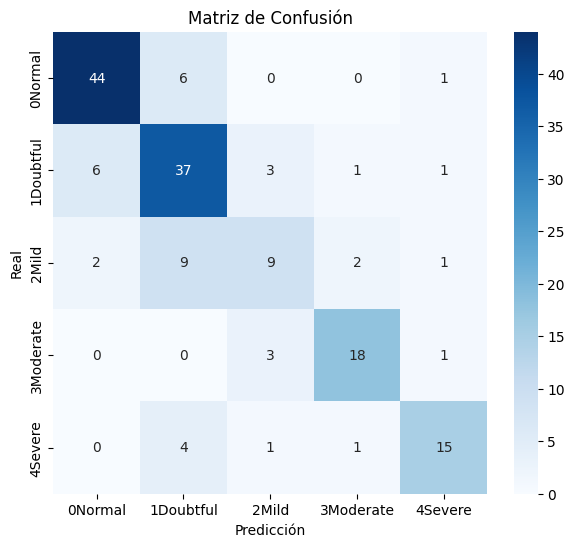


REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

     0Normal       0.85      0.86      0.85        51
   1Doubtful       0.66      0.77      0.71        48
       2Mild       0.56      0.39      0.46        23
   3Moderate       0.82      0.82      0.82        22
     4Severe       0.79      0.71      0.75        21

    accuracy                           0.75       165
   macro avg       0.74      0.71      0.72       165
weighted avg       0.74      0.75      0.74       165


========== EVALUACIÓN EN ENTRENAMIENTO ==========
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.8222 - loss: 0.4734

Train Loss: 0.4692
Train Accuracy: 82.73%
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step


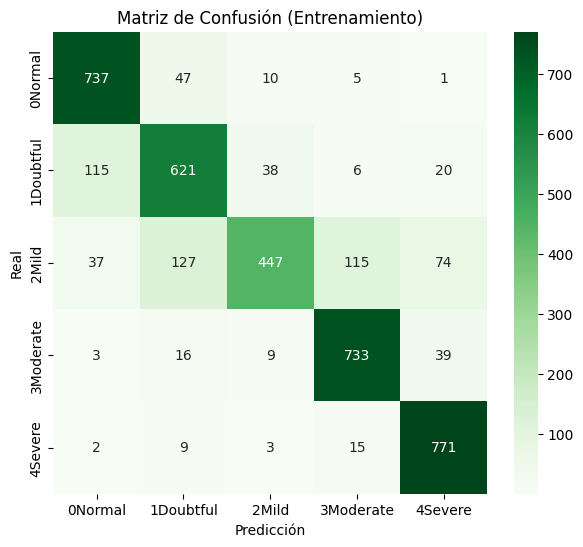


REPORTE DE CLASIFICACIÓN (ENTRENAMIENTO):
              precision    recall  f1-score   support

     0Normal       0.82      0.92      0.87       800
   1Doubtful       0.76      0.78      0.77       800
       2Mild       0.88      0.56      0.68       800
   3Moderate       0.84      0.92      0.88       800
     4Severe       0.85      0.96      0.90       800

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.82      4000
weighted avg       0.83      0.83      0.82      4000



In [ ]:
# ================================
# 1. IMPORTACIONES
# ================================
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

# ================================
# 2. PREPROCESAMIENTO
# ================================

# Usa la función de preprocesamiento de ResNet
X_train = resnet_preprocess(train_images_raw.astype(np.float32))
y_train = to_categorical(train_labels_raw, num_classes=5)

X_val = np.array([load_and_preprocess(fp) for fp in val_df['Filepath']])
X_val = resnet_preprocess(X_val.astype(np.float32))
y_val = to_categorical(val_df['Encoded_Category'], num_classes=5)

X_test = np.array([load_and_preprocess(fp) for fp in test_df['Filepath']])
X_test = resnet_preprocess(X_test.astype(np.float32))
y_test = to_categorical(test_df['Encoded_Category'], num_classes=5)

# ================================
# 3. CONSTRUCCIÓN DEL MODELO
# ================================
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False  # Congelamos capas base

inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(5, activation='softmax')(x)

model = Model(inputs, outputs)

# ================================
# 4. COMPILACIÓN Y ENTRENAMIENTO
# ================================
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32
)

# ================================
# 5. EVALUACIÓN FINAL
# ================================
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

# ================================
# 6. GRÁFICO DE LOSS Y ACCURACY
# ================================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# ================================
# 7. MATRIZ DE CONFUSIÓN
# ================================
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz
cm = confusion_matrix(y_true, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte detallado
print("\nREPORTE DE CLASIFICACIÓN:")
print(classification_report(y_true, y_pred, target_names=labels))


# 7B. MÉTRICAS ENTRENAMIENTO
# ================================
print("\n========== EVALUACIÓN EN ENTRENAMIENTO ==========")
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"\nTrain Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy*100:.2f}%")

# Predicciones sobre entrenamiento
y_train_pred_probs = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)
y_train_true = np.argmax(y_train, axis=1)

# Matriz de confusión entrenamiento
cm_train = confusion_matrix(y_train_true, y_train_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Entrenamiento)")
plt.show()

# Reporte de clasificación entrenamiento
print("\nREPORTE DE CLASIFICACIÓN (ENTRENAMIENTO):")
print(classification_report(y_train_true, y_train_pred, target_names=labels))

In [ ]:
# ================================
# 1. IMPORTACIONES
# ================================
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import pandas as pd

# ================================
# 2. PREPROCESAMIENTO
# ================================
# Assuming train_images_raw, train_labels_raw, val_df, test_df, and label_encoder are defined from your previous code
X_train = resnet_preprocess(train_images_raw.astype(np.float32))
y_train = to_categorical(train_labels_raw, num_classes=5)

X_val = np.array([load_and_preprocess(fp) for fp in val_df['Filepath']])
X_val = resnet_preprocess(X_val.astype(np.float32))
y_val = to_categorical(val_df['Encoded_Category'], num_classes=5)

X_test = np.array([load_and_preprocess(fp) for fp in test_df['Filepath']])
X_test = resnet_preprocess(X_test.astype(np.float32))
y_test = to_categorical(test_df['Encoded_Category'], num_classes=5)

# ================================
# 3. FUNCIÓN PARA CREAR MODELO
# ================================
def create_model(learning_rate, dropout_rate1, dropout_rate2, dense_units):
    input_shape = (224, 224, 3)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Congelamos capas base

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout_rate1)(x)
    x = Dense(dense_units, activation='relu')(x)
    x = Dropout(dropout_rate2)(x)
    outputs = Dense(5, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ================================
# 4. GRID SEARCH
# ================================
param_grid = {
    'learning_rate': [1e-5, 1e-3, 1e-4],
    'dropout_rate1': [0.2, 0.3, 0.4],
    'dropout_rate2': [0.1, 0.2, 0.3],
    'dense_units': [64, 128, 256],
    'batch_size': [16, 32, 64]
}

# Generar todas las combinaciones de hiperparámetros
param_combinations = list(ParameterGrid(param_grid))
print(f"Total combinaciones a probar: {len(param_combinations)}")

best_val_accuracy = 0
best_params = None
best_model = None
best_history = None

# Listas para almacenar resultados
results = []

# Iterar sobre todas las combinaciones
for params in param_combinations:
    print(f"\nProbando parámetros: {params}")

    # Crear y entrenar modelo
    model = create_model(
        learning_rate=params['learning_rate'],
        dropout_rate1=params['dropout_rate1'],
        dropout_rate2=params['dropout_rate2'],
        dense_units=params['dense_units']
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,  # Reducimos épocas para Grid Search
        batch_size=params['batch_size'],
        verbose=0
    )

    # Evaluar en validación
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

    # Guardar resultados
    results.append({
        'params': params,
        'val_accuracy': val_accuracy,
        'val_loss': val_loss
    })

    # Actualizar mejor modelo
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = params
        best_model = model
        best_history = history

# Mostrar mejores parámetros
print("\nMejores parámetros encontrados:")
print(best_params)
print(f"Mejor Validation Accuracy: {best_val_accuracy*100:.2f}%")

# ================================
# 5. ENTRENAMIENTO FINAL CON MEJORES PARÁMETROS
# ================================
# Reentrenar el mejor modelo con más épocas
final_model = create_model(
    learning_rate=best_params['learning_rate'],
    dropout_rate1=best_params['dropout_rate1'],
    dropout_rate2=best_params['dropout_rate2'],
    dense_units=best_params['dense_units']
)

history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=best_params['batch_size']
)

# ================================
# 6. EVALUACIÓN FINAL
# ================================
# Evaluación en conjunto de entrenamiento
train_loss, train_accuracy = final_model.evaluate(X_train, y_train)
print(f"\nTraining Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

# Evaluación en conjunto de prueba
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# ================================
# 7. GRÁFICO DE LOSS Y ACCURACY
# ================================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# ================================
# 8. MATRICES DE CONFUSIÓN
# ================================
# Matriz de confusión para entrenamiento
y_train_pred_probs = final_model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)
y_train_true = np.argmax(y_train, axis=1)

cm_train = confusion_matrix(y_train_true, y_train_pred)
labels = label_encoder.classes_

plt.figure(figsize=(7,6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Entrenamiento")
plt.show()

print("\nREPORTE DE CLASIFICACIÓN - ENTRENAMIENTO:")
print(classification_report(y_train_true, y_train_pred, target_names=labels))

# Matriz de confusión para prueba
y_test_pred_probs = final_model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
y_test_true = np.argmax(y_test, axis=1)

cm_test = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Prueba")
plt.show()

print("\nREPORTE DE CLASIFICACIÓN - PRUEBA:")
print(classification_report(y_test_true, y_test_pred, target_names=labels))

Total combinaciones a probar: 324

Probando parámetros: {'batch_size': 16, 'dense_units': 64, 'dropout_rate1': 0.2, 'dropout_rate2': 0.1, 'learning_rate': 1e-05}
Validation Accuracy: 64.24%

Probando parámetros: {'batch_size': 16, 'dense_units': 64, 'dropout_rate1': 0.2, 'dropout_rate2': 0.1, 'learning_rate': 5e-05}
Validation Accuracy: 67.88%

Probando parámetros: {'batch_size': 16, 'dense_units': 64, 'dropout_rate1': 0.2, 'dropout_rate2': 0.1, 'learning_rate': 0.0001}
Validation Accuracy: 72.42%

Probando parámetros: {'batch_size': 16, 'dense_units': 64, 'dropout_rate1': 0.2, 'dropout_rate2': 0.1, 'learning_rate': 0.0005}
Validation Accuracy: 76.06%

Probando parámetros: {'batch_size': 16, 'dense_units': 64, 'dropout_rate1': 0.2, 'dropout_rate2': 0.2, 'learning_rate': 1e-05}
Validation Accuracy: 64.24%

Probando parámetros: {'batch_size': 16, 'dense_units': 64, 'dropout_rate1': 0.2, 'dropout_rate2': 0.2, 'learning_rate': 5e-05}
Validation Accuracy: 68.18%

Probando parámetros: {'batc

# **DenseNet121**

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 57s 245ms/step - accuracy: 0.2433 - loss: 1.8907 - val_accuracy: 0.4818 - val_loss: 1.3099
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 48s 83ms/step - accuracy: 0.3673 - loss: 1.4878 - val_accuracy: 0.5273 - val_loss: 1.1971
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.4131 - loss: 1.3774 - val_accuracy: 0.5333 - val_loss: 1.1379
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.4499 - loss: 1.2954 - val_accuracy: 0.6091 - val_loss: 1.0779
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.4644 - loss: 1.2634 - val_accuracy: 0.6121 - val_loss: 1.0411
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.4859 - loss: 1.2102 - val_accuracy: 0.6121 - val_loss: 1.0118
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.4829 - loss: 1.2150 - val_accuracy: 0.6303 - val_loss: 0.9863
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━

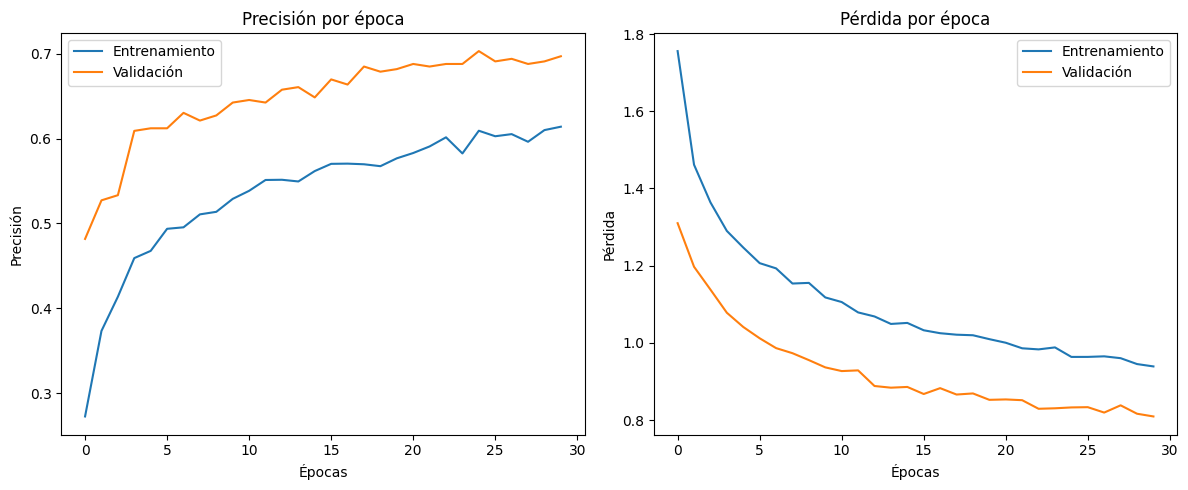

6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


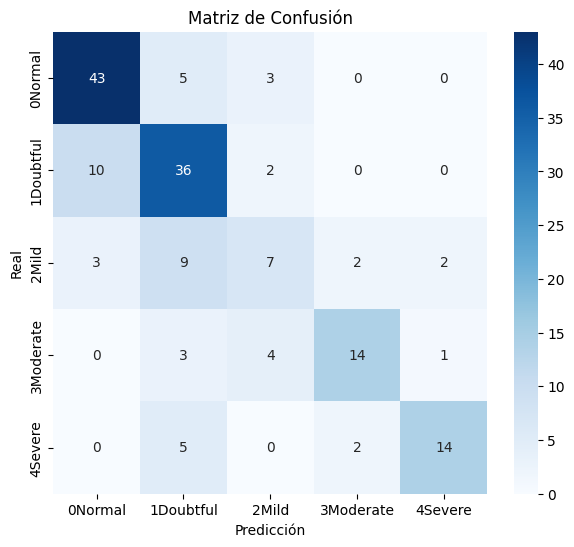


REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

     0Normal       0.77      0.84      0.80        51
   1Doubtful       0.62      0.75      0.68        48
       2Mild       0.44      0.30      0.36        23
   3Moderate       0.78      0.64      0.70        22
     4Severe       0.82      0.67      0.74        21

    accuracy                           0.69       165
   macro avg       0.69      0.64      0.66       165
weighted avg       0.69      0.69      0.68       165


========== EVALUACIÓN EN ENTRENAMIENTO ==========
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.7282 - loss: 0.7544

Train Loss: 0.7530
Train Accuracy: 72.62%
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step


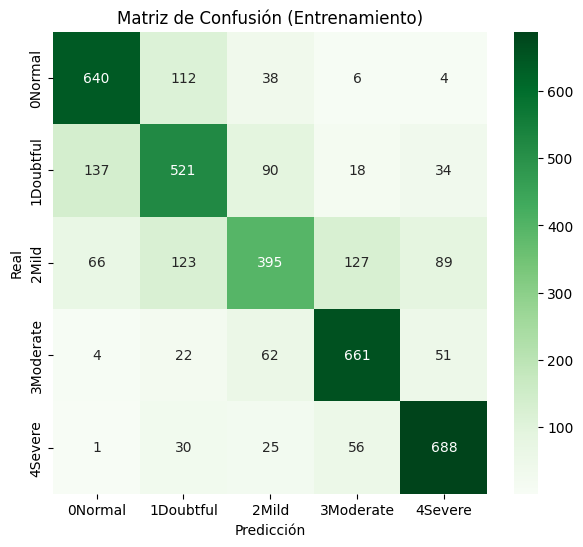


REPORTE DE CLASIFICACIÓN (ENTRENAMIENTO):
              precision    recall  f1-score   support

     0Normal       0.75      0.80      0.78       800
   1Doubtful       0.64      0.65      0.65       800
       2Mild       0.65      0.49      0.56       800
   3Moderate       0.76      0.83      0.79       800
     4Severe       0.79      0.86      0.83       800

    accuracy                           0.73      4000
   macro avg       0.72      0.73      0.72      4000
weighted avg       0.72      0.73      0.72      4000



In [ ]:
# =============================
# 1. IMPORTACIONES
# =============================
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

# =============================
# 2. PREPROCESAMIENTO
# =============================
# Convertir etiquetas a one-hot
X_train = densenet_preprocess(train_images_raw.astype(np.float32))
y_train = to_categorical(train_labels_raw, num_classes=5)

X_val = np.array([load_and_preprocess(fp) for fp in val_df['Filepath']])
X_val = densenet_preprocess(X_val.astype(np.float32))
y_val = to_categorical(val_df['Encoded_Category'], num_classes=5)

X_test = np.array([load_and_preprocess(fp) for fp in test_df['Filepath']])
X_test = densenet_preprocess(X_test.astype(np.float32))
y_test = to_categorical(test_df['Encoded_Category'], num_classes=5)

# =============================
# 3. CONSTRUCCIÓN DEL MODELO
# =============================
input_shape = (224, 224, 3)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False  # congelamos capas base

inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(5, activation='softmax')(x)

model = Model(inputs, outputs)

# =============================
# 4. COMPILACIÓN Y ENTRENAMIENTO
# =============================
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32
)

# =============================
# 5. EVALUACIÓN
# =============================
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

# =============================
# 6. GRÁFICO DE ACCURACY Y LOSS
# =============================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# =============================
# 7. MATRIZ DE CONFUSIÓN
# =============================
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz
cm = confusion_matrix(y_true, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte detallado
print("\nREPORTE DE CLASIFICACIÓN:")
print(classification_report(y_true, y_pred, target_names=labels))



# ================================
# 7B. MÉTRICAS ENTRENAMIENTO
# ================================
print("\n========== EVALUACIÓN EN ENTRENAMIENTO ==========")
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"\nTrain Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy*100:.2f}%")

# Predicciones sobre entrenamiento
y_train_pred_probs = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)
y_train_true = np.argmax(y_train, axis=1)

# Matriz de confusión entrenamiento
cm_train = confusion_matrix(y_train_true, y_train_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Entrenamiento)")
plt.show()

# Reporte de clasificación entrenamiento
print("\nREPORTE DE CLASIFICACIÓN (ENTRENAMIENTO):")
print(classification_report(y_train_true, y_train_pred, target_names=labels))


# **EfficentNetB0**

In [ ]:
# y_train, y_val, y_test deben ser vectores como: [0, 1, 2, 0, ...]
print(y_train.shape)  # Debe ser (n,) — no (n,5)


(4000, 5)


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 104s 229ms/step - accuracy: 0.5618 - loss: 1.1053 - val_accuracy: 0.6364 - val_loss: 1.3265 - learning_rate: 0.0010
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 30s 124ms/step - accuracy: 0.8010 - loss: 0.5351 - val_accuracy: 0.6758 - val_loss: 0.9762 - learning_rate: 0.0010
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.8542 - loss: 0.3810 - val_accuracy: 0.7545 - val_loss: 0.9308 - learning_rate: 0.0010
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.9065 - loss: 0.2760 - val_accuracy: 0.7727 - val_loss: 0.7437 - learning_rate: 0.0010
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.9092 - loss: 0.2366 - val_accuracy: 0.8121 - val_loss: 0.9999 - learning_rate: 0.0010
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9177 - loss: 0.2332 - val_accuracy: 0.7788 - val_loss: 0.9181 - learning_rate: 0.0010
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.

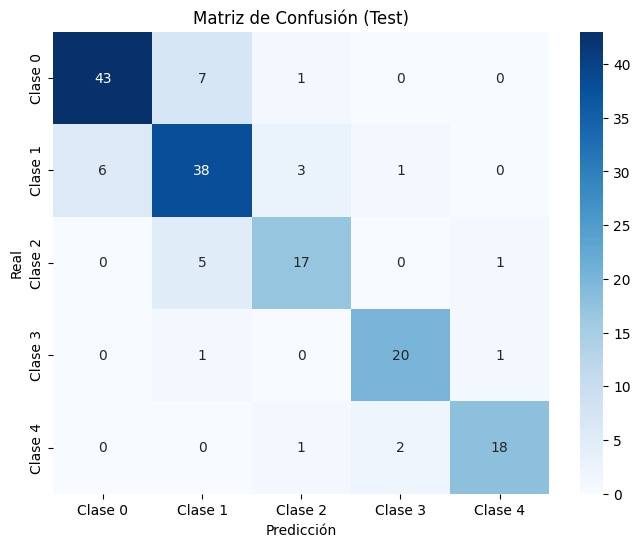


========== EVALUACIÓN EN ENTRENAMIENTO ==========
Train Accuracy: 0.9998, Train Loss: 0.0004
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step

Classification Report (Train):
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00       800
     Clase 1       1.00      1.00      1.00       800
     Clase 2       1.00      1.00      1.00       800
     Clase 3       1.00      1.00      1.00       800
     Clase 4       1.00      1.00      1.00       800

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



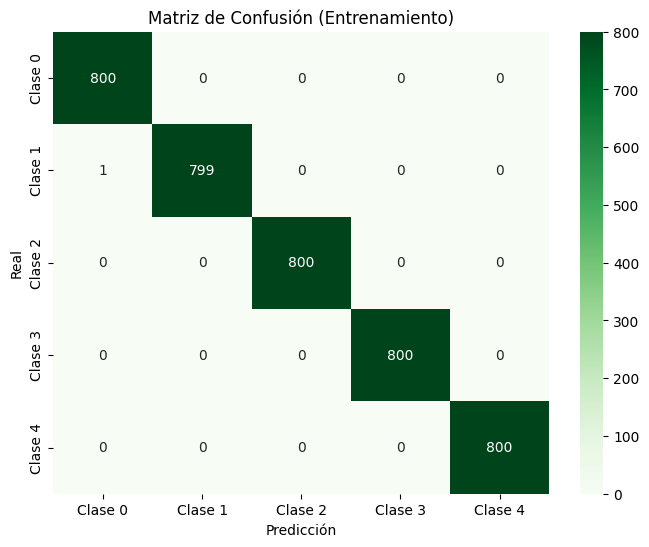

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

labels = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4']
# ---------------------------------------------------------------

# Crear modelo con EfficientNetB0
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Descongelar últimas 20 capas
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Construcción del modelo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 clases
])

# ✅ Pérdida adecuada para etiquetas enteras
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback para reducir LR si no mejora el val_loss
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[lr_scheduler]
)

# ================================
# EVALUACIÓN EN TEST
# ================================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Predicciones en test
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Reporte y matriz de confusión para test
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred, target_names=labels))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión (Test)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ================================
# EVALUACIÓN EN ENTRENAMIENTO
# ================================
print("\n========== EVALUACIÓN EN ENTRENAMIENTO ==========")
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")

# Predicciones en entrenamiento
y_train_pred_probs = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)

# Reporte y matriz de confusión para entrenamiento
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred, target_names=labels))

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión (Entrenamiento)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 109s 236ms/step - accuracy: 0.4443 - loss: 1.2895 - val_accuracy: 0.4242 - val_loss: 2.8060 - learning_rate: 0.0010
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.7371 - loss: 0.6775 - val_accuracy: 0.6909 - val_loss: 1.0172 - learning_rate: 0.0010
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.8084 - loss: 0.5017 - val_accuracy: 0.7909 - val_loss: 0.6622 - learning_rate: 0.0010
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.8668 - loss: 0.3825 - val_accuracy: 0.7303 - val_loss: 1.7041 - learning_rate: 0.0010
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.9013 - loss: 0.2815 - val_accuracy: 0.6788 - val_loss: 1.3215 - learning_rate: 0.0010
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.9200 - loss: 0.2359 - val_accuracy: 0.6667 - val_loss: 1.2149 - learning_rate: 0.0010
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.

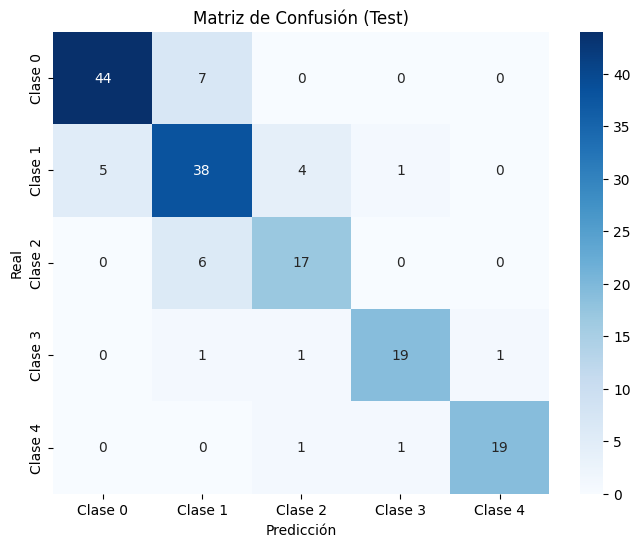


========== EVALUACIÓN EN ENTRENAMIENTO ==========
Train Accuracy: 0.9998, Train Loss: 0.0004
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step

Classification Report (Train):
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00       800
     Clase 1       1.00      1.00      1.00       800
     Clase 2       1.00      1.00      1.00       800
     Clase 3       1.00      1.00      1.00       800
     Clase 4       1.00      1.00      1.00       800

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



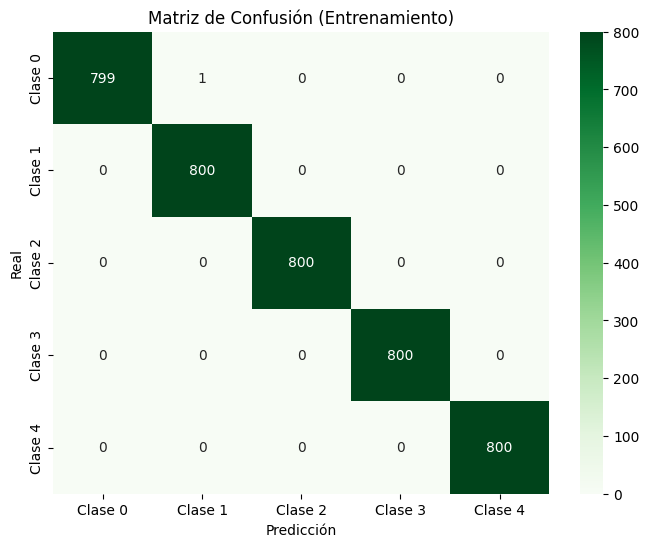

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

labels = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4']
# ---------------------------------------------------------------

# Crear modelo con EfficientNetB0
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Descongelar últimas 20 capas
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Construcción del modelo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.8),
    Dense(5, activation='softmax')  # 5 clases
])

# ✅ Pérdida adecuada para etiquetas enteras
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback para reducir LR si no mejora el val_loss
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[lr_scheduler]
)

# ================================
# EVALUACIÓN EN TEST
# ================================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Predicciones en test
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Reporte y matriz de confusión para test
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred, target_names=labels))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión (Test)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ================================
# EVALUACIÓN EN ENTRENAMIENTO
# ================================
print("\n========== EVALUACIÓN EN ENTRENAMIENTO ==========")
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")

# Predicciones en entrenamiento
y_train_pred_probs = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)

# Reporte y matriz de confusión para entrenamiento
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred, target_names=labels))

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión (Entrenamiento)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 102s 212ms/step - accuracy: 0.2798 - loss: 1.5945 - val_accuracy: 0.3485 - val_loss: 1.4361
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 126ms/step - accuracy: 0.5859 - loss: 1.0207 - val_accuracy: 0.5333 - val_loss: 1.0829
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.7072 - loss: 0.7234 - val_accuracy: 0.6636 - val_loss: 0.8600
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.7934 - loss: 0.5178 - val_accuracy: 0.7455 - val_loss: 0.6659
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.8418 - loss: 0.4208 - val_accuracy: 0.7758 - val_loss: 0.6019
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.8937 - loss: 0.2904 - val_accuracy: 0.8030 - val_loss: 0.6399
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.9013 - loss: 0.2388 - val_accuracy: 0.8152 - val_loss: 0.4923
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.9430 - loss: 

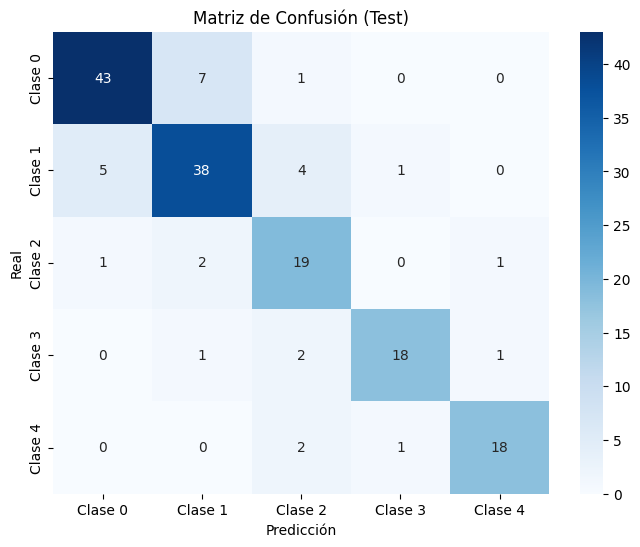


========== EVALUACIÓN EN ENTRENAMIENTO ==========
Train Accuracy: 0.9987, Train Loss: 0.0039
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step

Classification Report (Train):
              precision    recall  f1-score   support

     Clase 0       1.00      0.99      1.00       800
     Clase 1       1.00      1.00      1.00       800
     Clase 2       1.00      1.00      1.00       800
     Clase 3       1.00      1.00      1.00       800
     Clase 4       1.00      1.00      1.00       800

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



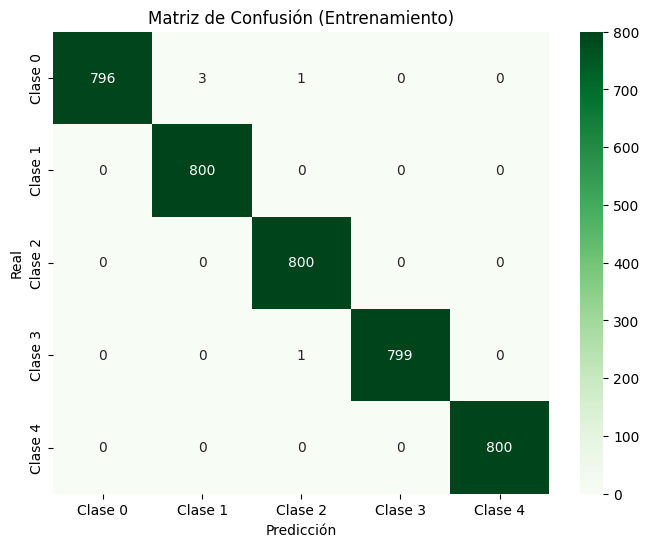

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

labels = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4']

# ---------------------------------------------------------------
# Crear modelo con EfficientNetB0
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Descongelar últimas 20 capas
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Construcción del modelo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.8),
    Dense(5, activation='softmax')  # 5 clases
])

# ✅ Usar un LR fijo: 0.0001 (ajústalo si es necesario)
fixed_lr = 0.0001
model.compile(optimizer=Adam(learning_rate=fixed_lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 🚫 Sin callbacks (no ReduceLROnPlateau)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32
)

# ================================
# EVALUACIÓN EN TEST
# ================================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Predicciones en test
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Reporte y matriz de confusión para test
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred, target_names=labels))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión (Test)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ================================
# EVALUACIÓN EN ENTRENAMIENTO
# ================================
print("\n========== EVALUACIÓN EN ENTRENAMIENTO ==========")
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")

# Predicciones en entrenamiento
y_train_pred_probs = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)

# Reporte y matriz de confusión para entrenamiento
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred, target_names=labels))

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión (Entrenamiento)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 104s 224ms/step - accuracy: 0.3796 - loss: 1.4534 - val_accuracy: 0.4455 - val_loss: 1.9713 - learning_rate: 0.0010
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.5956 - loss: 1.0134 - val_accuracy: 0.5576 - val_loss: 1.2545 - learning_rate: 0.0010
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.6808 - loss: 0.8436 - val_accuracy: 0.6848 - val_loss: 0.8368 - learning_rate: 0.0010
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - accuracy: 0.7154 - loss: 0.7482 - val_accuracy: 0.7000 - val_loss: 0.6988 - learning_rate: 0.0010
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.7605 - loss: 0.6527 - val_accuracy: 0.6848 - val_loss: 1.1573 - learning_rate: 0.0010
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.7589 - loss: 0.6147 - val_accuracy: 0.8061 - val_loss: 0.5877 - learning_rate: 0.0010
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.

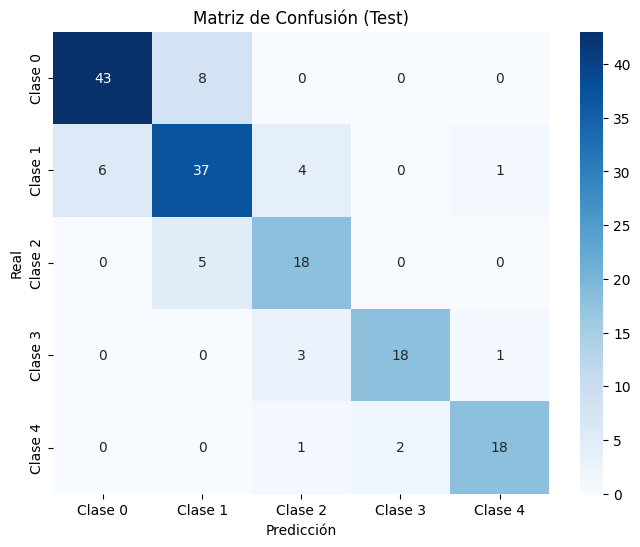


========== EVALUACIÓN EN ENTRENAMIENTO ==========
Train Accuracy: 0.9998, Train Loss: 0.0007
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step

Classification Report (Train):
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00       800
     Clase 1       1.00      1.00      1.00       800
     Clase 2       1.00      1.00      1.00       800
     Clase 3       1.00      1.00      1.00       800
     Clase 4       1.00      1.00      1.00       800

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



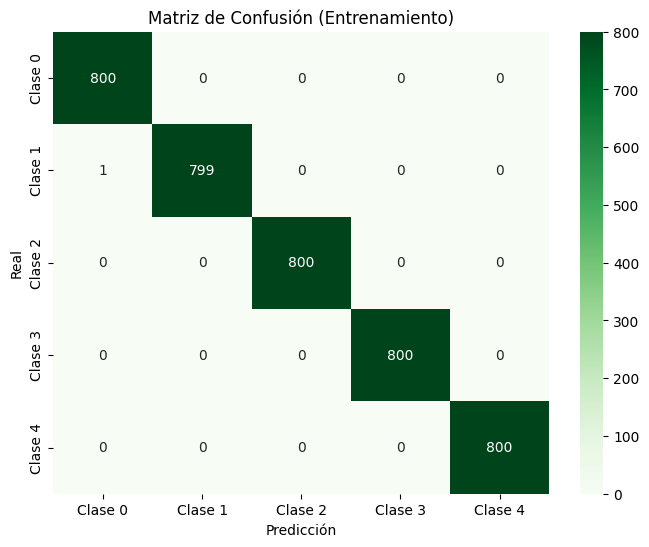

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

labels = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4']
# ---------------------------------------------------------------

# Crear modelo con EfficientNetB0
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Descongelar últimas 20 capas
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Construcción del modelo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.8),
    Dense(5, activation='softmax')  # 5 clases
])

# ✅ Pérdida adecuada para etiquetas enteras
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback para reducir LR si no mejora el val_loss
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[lr_scheduler]
)

# ================================
# EVALUACIÓN EN TEST
# ================================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Predicciones en test
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Reporte y matriz de confusión para test
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred, target_names=labels))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión (Test)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ================================
# EVALUACIÓN EN ENTRENAMIENTO
# ================================
print("\n========== EVALUACIÓN EN ENTRENAMIENTO ==========")
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")

# Predicciones en entrenamiento
y_train_pred_probs = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)

# Reporte y matriz de confusión para entrenamiento
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred, target_names=labels))

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión (Entrenamiento)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [ ]:
# ================================
# 1. IMPORTACIONES
# ================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import ParameterGrid

# ================================
# 2. PREPROCESAMIENTO (asumido ya hecho)
# ================================
# X_train, y_train, X_val, y_val, X_test, y_test, labels deben estar definidos previamente

# ================================
# 3. FUNCIÓN PARA CREAR MODELO
# ================================
def create_efficientnet_model(learning_rate, dropout_rate, dense_units):
    input_tensor = Input(shape=(224, 224, 3))
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)

    # Congelar todas menos las últimas 20 capas
    for layer in base_model.layers[:-20]:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(dense_units, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    output = Dense(5, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ================================
# 4. BÚSQUEDA DE PARÁMETROS (reducida a 5 combos)
# ================================
param_grid = [
    {'learning_rate': 1e-4, 'dropout_rate': 0.3, 'dense_units': 128, 'batch_size': 32},
    {'learning_rate': 1e-4, 'dropout_rate': 0.5, 'dense_units': 256, 'batch_size': 32},
    {'learning_rate': 1e-5, 'dropout_rate': 0.4, 'dense_units': 128, 'batch_size': 64},
    {'learning_rate': 1e-3, 'dropout_rate': 0.3, 'dense_units': 64,  'batch_size': 32},
    {'learning_rate': 1e-4, 'dropout_rate': 0.6, 'dense_units': 128, 'batch_size': 16},
]

best_model = None
best_acc = 0
best_params = None

for params in param_grid:
    print(f"\nProbando combinación: {params}")
    model = create_efficientnet_model(
        learning_rate=params['learning_rate'],
        dropout_rate=params['dropout_rate'],
        dense_units=params['dense_units']
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=params['batch_size'],
        verbose=0
    )

    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation accuracy: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_model = model
        best_params = params

print("\nMejores hiperparámetros encontrados:")
print(best_params)

# ================================
# 5. ENTRENAMIENTO FINAL CON MEJORES PARAMETROS
# ================================
final_model = create_efficientnet_model(
    learning_rate=best_params['learning_rate'],
    dropout_rate=best_params['dropout_rate'],
    dense_units=best_params['dense_units']
)

history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=best_params['batch_size'],
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)],
    verbose=1
)

# ================================
# 6. EVALUACION EN TEST
# ================================
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ================================
# 7. REPORTES Y MATRICES
# ================================
labels = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4']

# --- Test ---
y_test_pred_probs = final_model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, target_names=labels))

plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - Test")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# --- Train ---
y_train_pred_probs = final_model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred, target_names=labels))

plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, cmap="Greens", fmt='d', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - Entrenamiento")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()



Probando combinación: {'learning_rate': 0.0001, 'dropout_rate': 0.3, 'dense_units': 128, 'batch_size': 32}
Validation accuracy: 0.8303

Probando combinación: {'learning_rate': 0.0001, 'dropout_rate': 0.5, 'dense_units': 256, 'batch_size': 32}
Validation accuracy: 0.8364

Probando combinación: {'learning_rate': 1e-05, 'dropout_rate': 0.4, 'dense_units': 128, 'batch_size': 64}
Validation accuracy: 0.7030

Probando combinación: {'learning_rate': 0.001, 'dropout_rate': 0.3, 'dense_units': 64, 'batch_size': 32}
Validation accuracy: 0.8121

Probando combinación: {'learning_rate': 0.0001, 'dropout_rate': 0.6, 'dense_units': 128, 'batch_size': 16}
Validation accuracy: 0.8303

Mejores hiperparámetros encontrados:
{'learning_rate': 0.0001, 'dropout_rate': 0.5, 'dense_units': 256, 'batch_size': 32}


# **Con base restando sobel a la original**

Imágenes por clase:
0Normal: 100 imágenes
1Doubtful: 100 imágenes
2Mild: 100 imágenes
3Moderate: 100 imágenes
4Severe: 100 imágenes


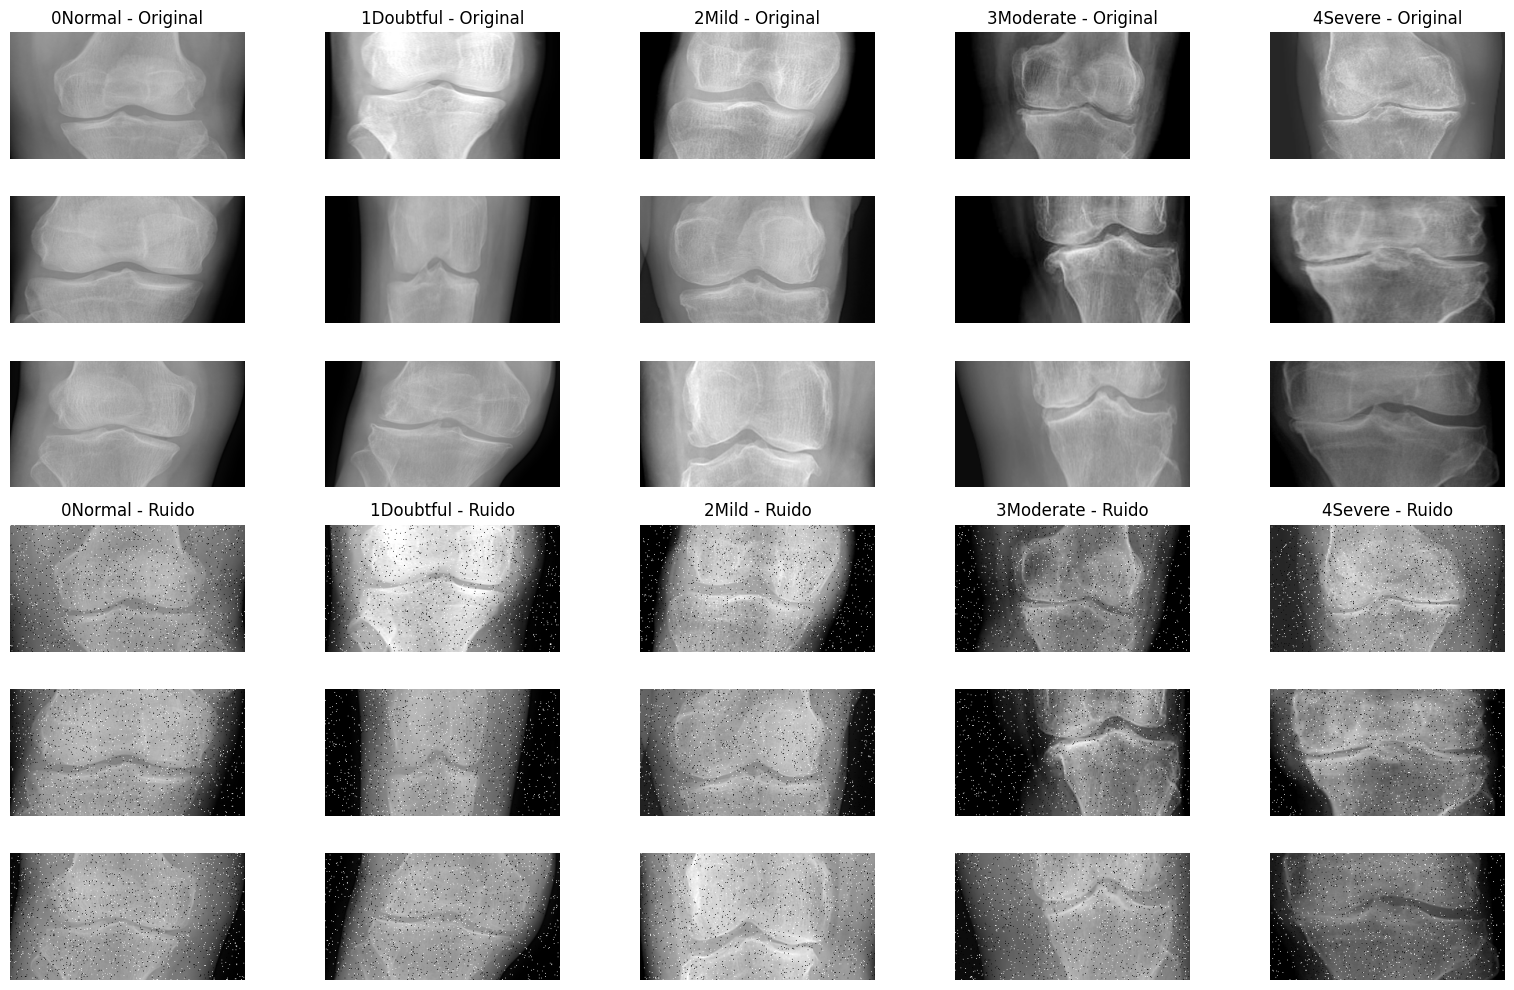

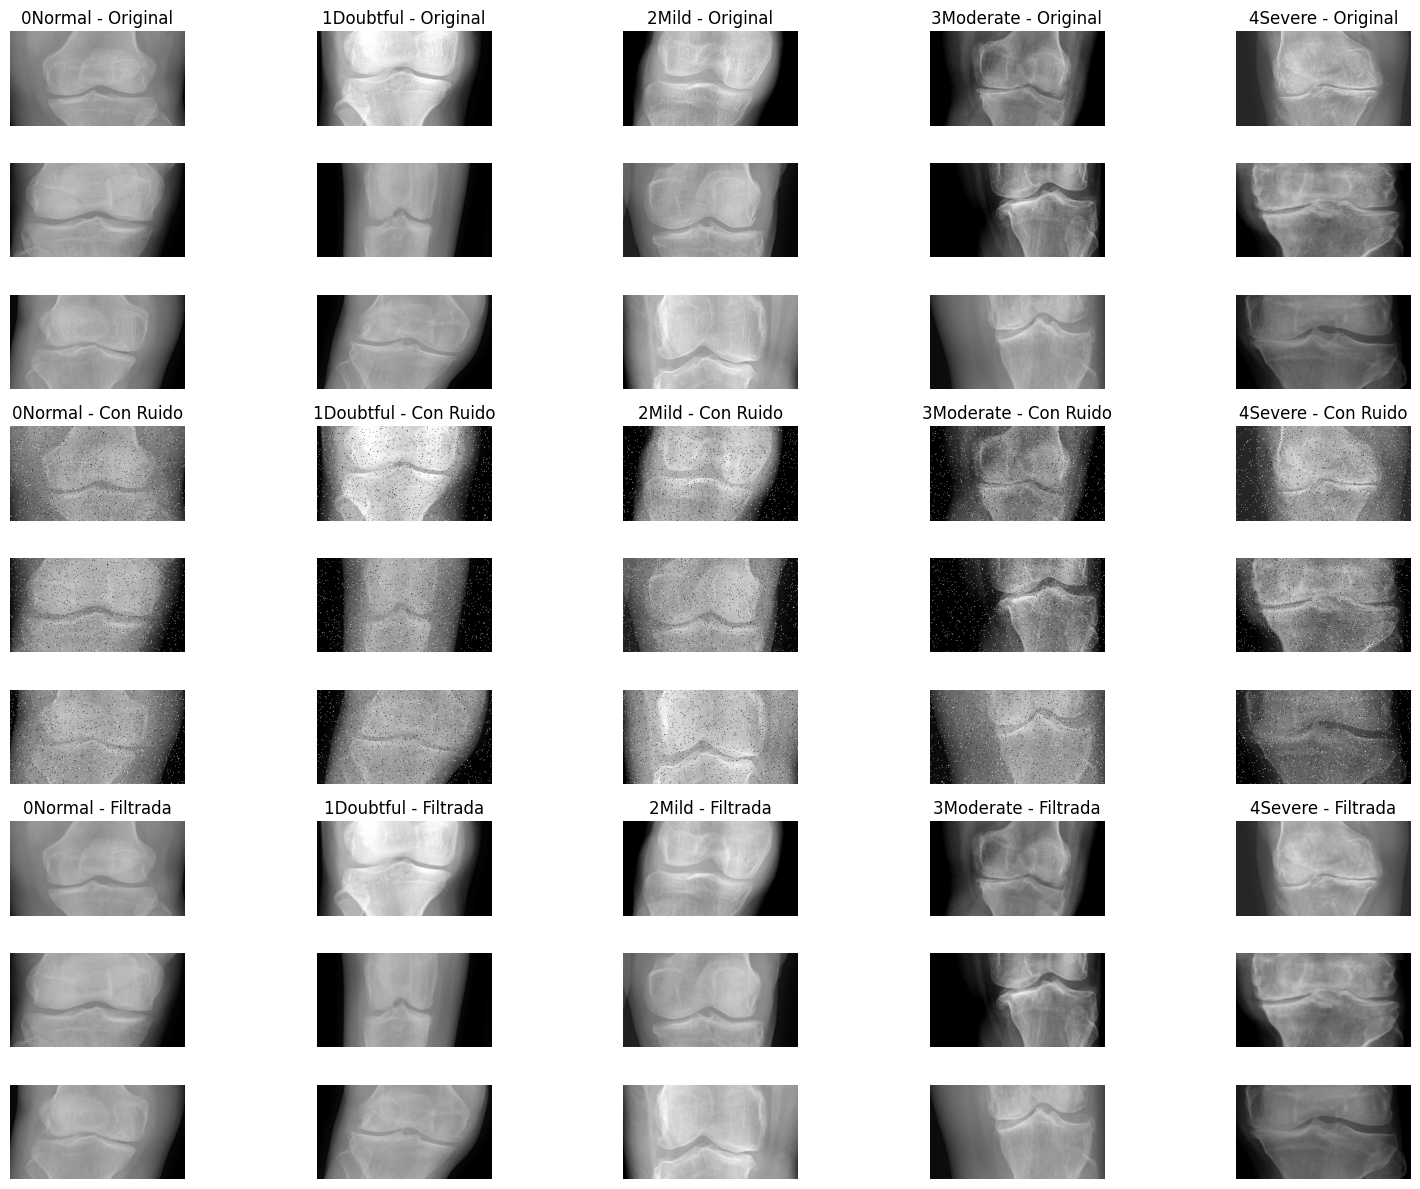

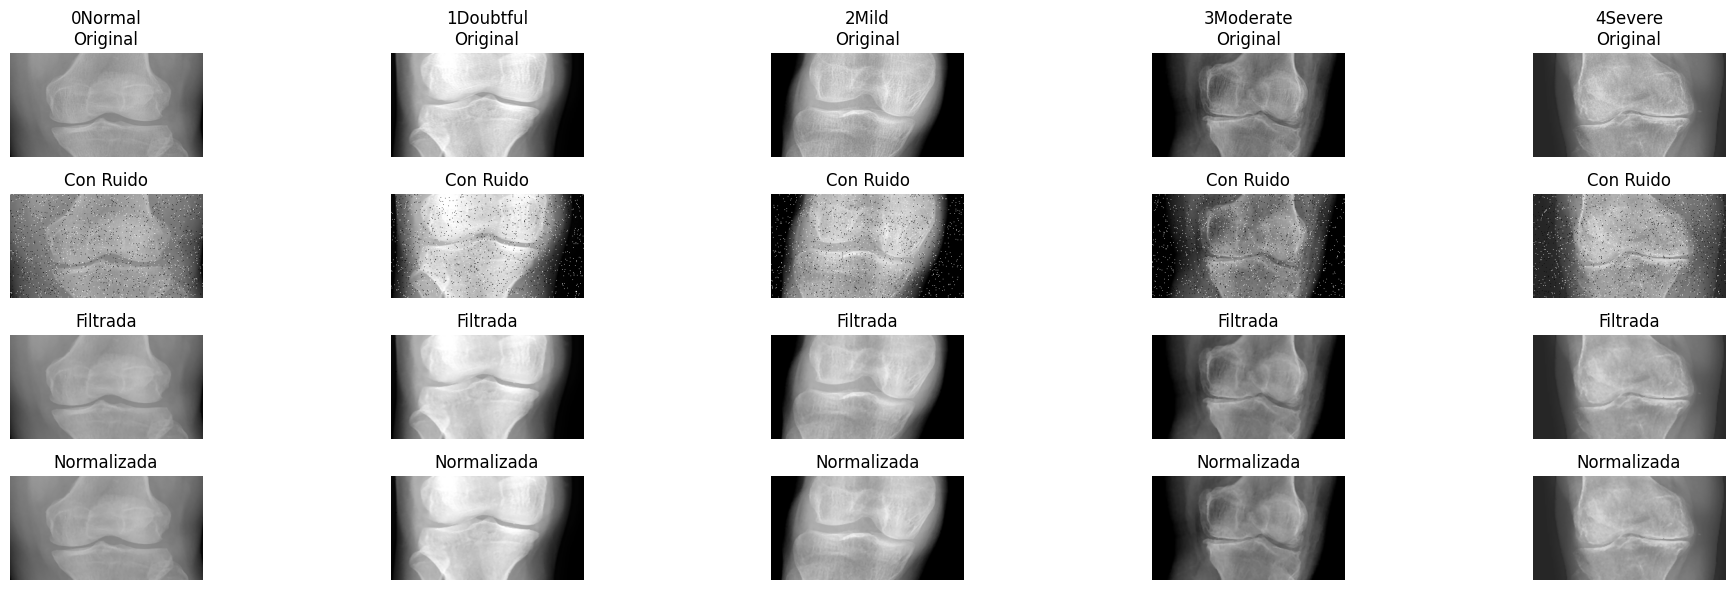

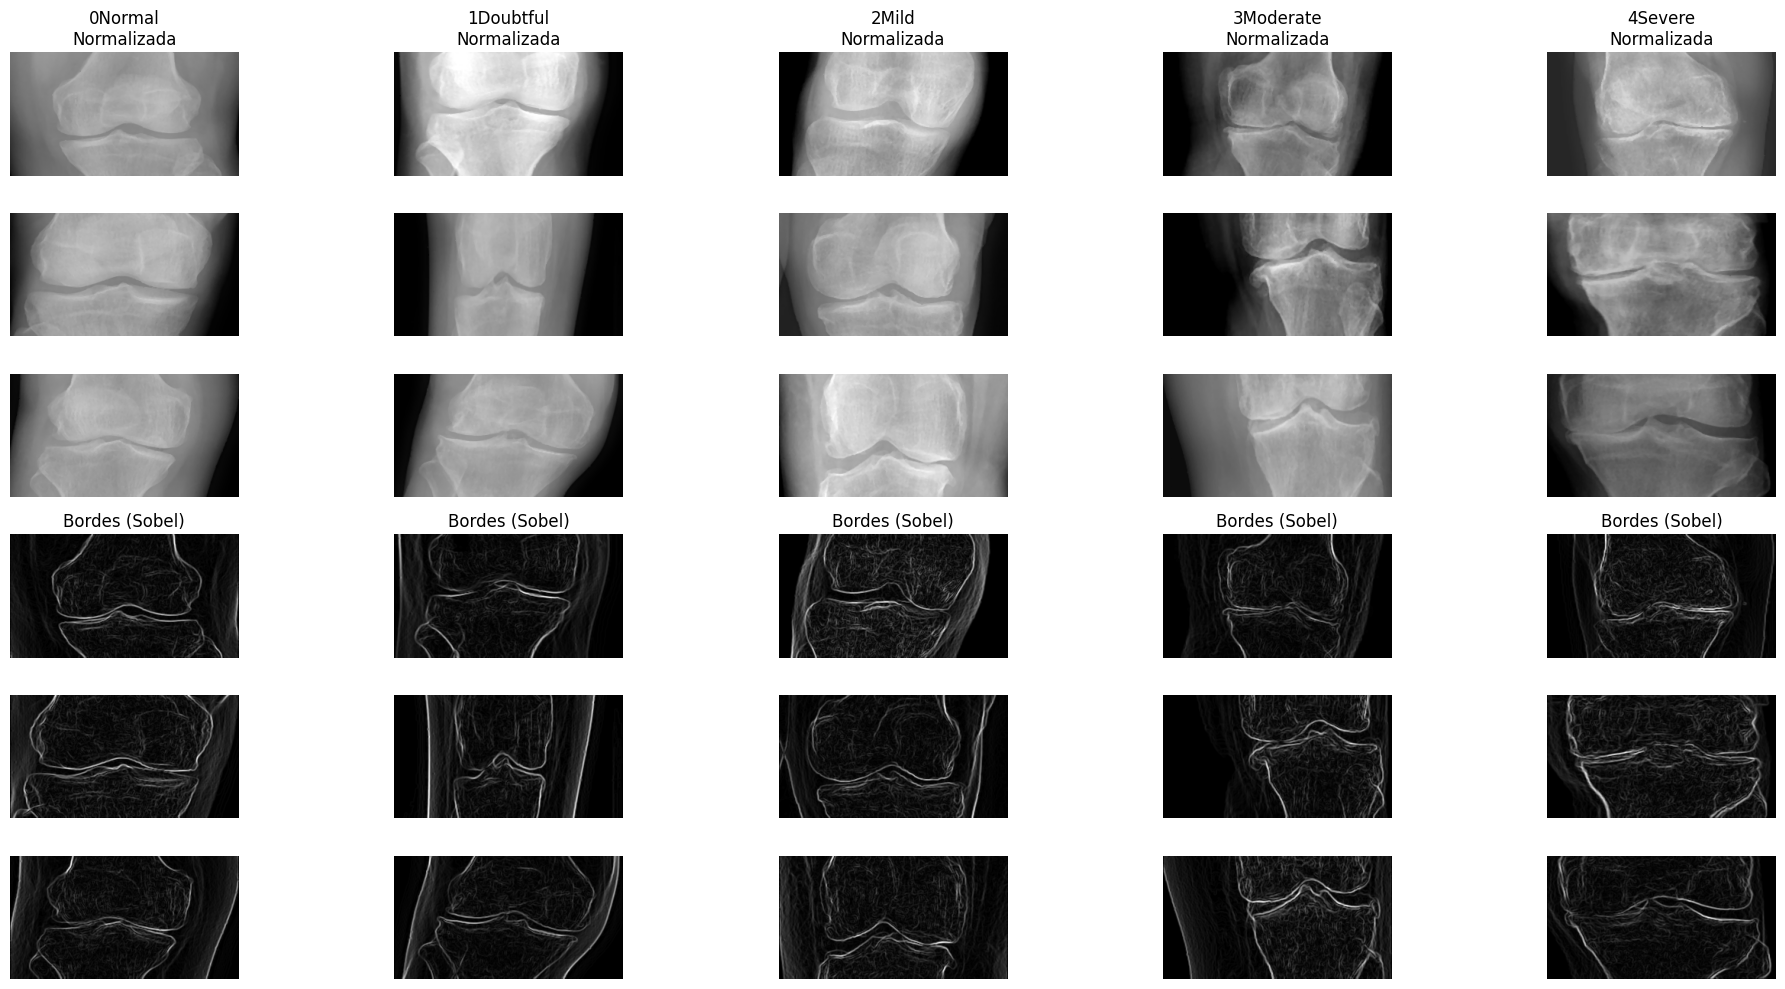

Las imágenes en la categoría 3Moderate no tienen la misma dimensión.
No todas las imágenes tienen la misma dimensión.


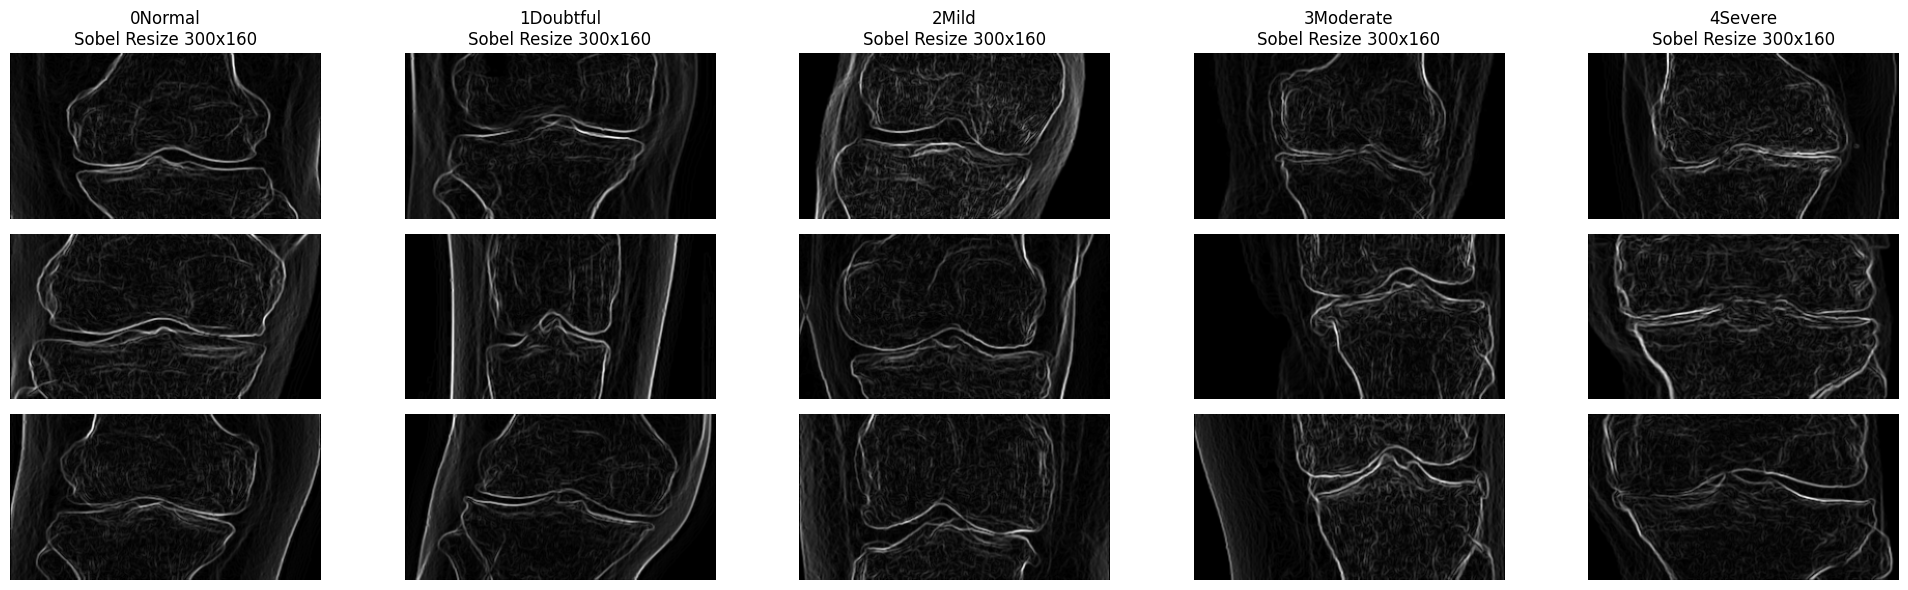

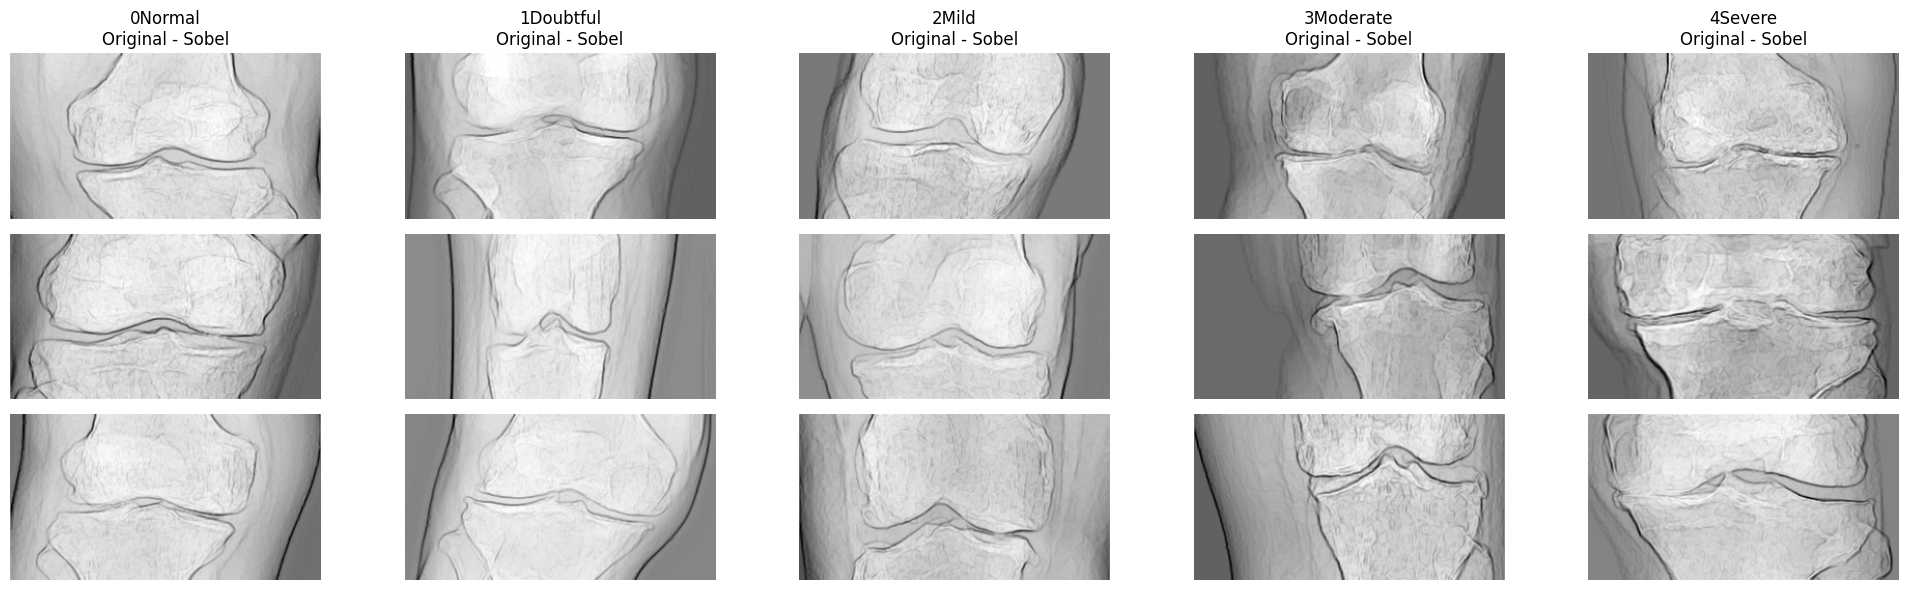

In [ ]:
import os
import cv2

# Ruta base del dataset
dataset_path = '/content/arthritis_dataset/Training'

# Categorías
categories = ['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']

# Diccionario para guardar las imágenes por clase
imagenes_0Normal = []
imagenes_1Doubtful = []
imagenes_2Mild = []
imagenes_3Moderate = []
imagenes_4Severe = []

# Diccionario auxiliar para referenciar los arreglos
clase_a_arreglo = {
    '0Normal': imagenes_0Normal,
    '1Doubtful': imagenes_1Doubtful,
    '2Mild': imagenes_2Mild,
    '3Moderate': imagenes_3Moderate,
    '4Severe': imagenes_4Severe
}

# Procesar cada categoría
for categoria in categories:
    ruta_categoria = os.path.join(dataset_path, categoria)
    archivos = sorted(os.listdir(ruta_categoria))[:100]  # Elegir las primeras 100 imágenes
    for archivo in archivos:
        ruta_imagen = os.path.join(ruta_categoria, archivo)
        imagen = cv2.imread(ruta_imagen)  # Cargar imagen
        if imagen is not None:
            clase_a_arreglo[categoria].append(imagen)

# Verificar la cantidad de imágenes cargadas
print("Imágenes por clase:")
for categoria, arreglo in clase_a_arreglo.items():
    print(f"{categoria}: {len(arreglo)} imágenes")

import numpy as np
import matplotlib.pyplot as plt

def agregar_ruido_sal_pimienta(imagen, cantidad=0.02):
    imagen_ruidosa = imagen.copy()
    filas, columnas = imagen.shape[:2]
    num_pixeles = int(cantidad * filas * columnas)

    # Agregar sal (blancos)
    for _ in range(num_pixeles):
        i = np.random.randint(0, filas)
        j = np.random.randint(0, columnas)
        imagen_ruidosa[i, j] = 255 if len(imagen.shape) == 2 else [255, 255, 255]

    # Agregar pimienta (negros)
    for _ in range(num_pixeles):
        i = np.random.randint(0, filas)
        j = np.random.randint(0, columnas)
        imagen_ruidosa[i, j] = 0 if len(imagen.shape) == 2 else [0, 0, 0]

    return imagen_ruidosa

# Crear nuevas listas para imágenes con ruido
imagenes_ruido = {
    '0Normal': [],
    '1Doubtful': [],
    '2Mild': [],
    '3Moderate': [],
    '4Severe': []
}

# Agregar ruido a todas las imágenes
for categoria, imagenes in clase_a_arreglo.items():
    for imagen in imagenes:
        con_ruido = agregar_ruido_sal_pimienta(imagen, cantidad=0.02)
        imagenes_ruido[categoria].append(con_ruido)

# Mostrar las 3 primeras imágenes originales y con ruido
plt.figure(figsize=(16, 10))
for clase_idx, categoria in enumerate(categories):
    for img_idx in range(3):
        original = clase_a_arreglo[categoria][img_idx]
        con_ruido = imagenes_ruido[categoria][img_idx]

        # Fila de imágenes originales
        plt.subplot(6, 5, img_idx * 5 + clase_idx + 1)
        plt.imshow(original, cmap='gray')
        if img_idx == 0:
            plt.title(f'{categoria} - Original')
        plt.axis('off')

        # Fila de imágenes con ruido
        plt.subplot(6, 5, (img_idx + 3) * 5 + clase_idx + 1)
        plt.imshow(con_ruido, cmap='gray')
        if img_idx == 0:
            plt.title(f'{categoria} - Ruido')
        plt.axis('off')

plt.tight_layout()
plt.show()


import cv2
import matplotlib.pyplot as plt

# Aplicar filtro de mediana a todas las imágenes con ruido
imagenes_filtradas = {
    '0Normal': [],
    '1Doubtful': [],
    '2Mild': [],
    '3Moderate': [],
    '4Severe': []
}

for categoria in categories:
    for imagen in imagenes_ruido[categoria]:
        filtrada = cv2.medianBlur(imagen, ksize=3)
        imagenes_filtradas[categoria].append(filtrada)

# Mostrar las 3 primeras: Original - Ruido - Filtrada
plt.figure(figsize=(16, 12))

for clase_idx, categoria in enumerate(categories):
    for img_idx in range(3):
        original = clase_a_arreglo[categoria][img_idx]
        con_ruido = imagenes_ruido[categoria][img_idx]
        filtrada = imagenes_filtradas[categoria][img_idx]

        # Original
        plt.subplot(9, 5, img_idx * 5 + clase_idx + 1)
        plt.imshow(original, cmap='gray')
        if img_idx == 0:
            plt.title(f'{categoria} - Original')
        plt.axis('off')

        # Ruido
        plt.subplot(9, 5, (img_idx + 3) * 5 + clase_idx + 1)
        plt.imshow(con_ruido, cmap='gray')
        if img_idx == 0:
            plt.title(f'{categoria} - Con Ruido')
        plt.axis('off')

        # Filtrada
        plt.subplot(9, 5, (img_idx + 6) * 5 + clase_idx + 1)
        plt.imshow(filtrada, cmap='gray')
        if img_idx == 0:
            plt.title(f'{categoria} - Filtrada')
        plt.axis('off')

plt.tight_layout()
plt.show()


# Normalizar imágenes filtradas (escala de grises de 0 a 1)
imagenes_normalizadas = {
    '0Normal': [],
    '1Doubtful': [],
    '2Mild': [],
    '3Moderate': [],
    '4Severe': []
}

for categoria in categories:
    for imagen in imagenes_filtradas[categoria]:
        normalizada = imagen.astype(np.float32) / 255.0  # Convertimos a float y normalizamos
        imagenes_normalizadas[categoria].append(normalizada)

# Mostrar Original - Con Ruido - Filtrada - Normalizada
plt.figure(figsize=(20, 6))

for i, categoria in enumerate(categories):
    original = clase_a_arreglo[categoria][0]
    con_ruido = imagenes_ruido[categoria][0]
    filtrada = imagenes_filtradas[categoria][0]
    normalizada = imagenes_normalizadas[categoria][0]

    # Original
    plt.subplot(4, 5, i + 1)
    plt.imshow(original, cmap='gray')
    plt.title(f'{categoria}\nOriginal')
    plt.axis('off')

    # Con ruido
    plt.subplot(4, 5, i + 6)
    plt.imshow(con_ruido, cmap='gray')
    plt.title('Con Ruido')
    plt.axis('off')

    # Filtrada
    plt.subplot(4, 5, i + 11)
    plt.imshow(filtrada, cmap='gray')
    plt.title('Filtrada')
    plt.axis('off')

    # Normalizada
    plt.subplot(4, 5, i + 16)
    plt.imshow(normalizada, cmap='gray')
    plt.title('Normalizada')
    plt.axis('off')

plt.tight_layout()
plt.show()

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Diccionario para guardar imágenes con Sobel
imagenes_bordes = {
    '0Normal': [],
    '1Doubtful': [],
    '2Mild': [],
    '3Moderate': [],
    '4Severe': []
}

# Aplicar Sobel a todas las imágenes normalizadas
for categoria in categories:
    for imagen_norm in imagenes_normalizadas[categoria]:
        img_float = imagen_norm.astype(np.float32)
        sobelx = cv2.Sobel(img_float, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(img_float, cv2.CV_64F, 0, 1, ksize=3)
        sobel_total = np.sqrt(sobelx**2 + sobely**2)
        sobel_total = sobel_total / sobel_total.max()
        imagenes_bordes[categoria].append(sobel_total)

# Mostrar las 3 primeras imágenes por categoría
plt.figure(figsize=(20, 10))

for clase_idx, categoria in enumerate(categories):
    for img_idx in range(3):
        imagen_norm = imagenes_normalizadas[categoria][img_idx]
        imagen_sobel = imagenes_bordes[categoria][img_idx]

        # Imagen normalizada
        plt.subplot(6, 5, img_idx * 5 + clase_idx + 1)
        plt.imshow(imagen_norm, cmap='gray')
        if img_idx == 0:
            plt.title(f'{categoria}\nNormalizada')
        plt.axis('off')

        # Imagen con bordes Sobel
        plt.subplot(6, 5, (img_idx + 3) * 5 + clase_idx + 1)
        plt.imshow(imagen_sobel, cmap='gray')
        if img_idx == 0:
            plt.title('Bordes (Sobel)')
        plt.axis('off')

plt.tight_layout()
plt.show()



import os
import cv2

# Ruta base del dataset
dataset_path = '/content/arthritis_dataset/Training'

# Categorías
categories = ['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']

# Diccionario para guardar las imágenes por clase
imagenes_0Normal = []
imagenes_1Doubtful = []
imagenes_2Mild = []
imagenes_3Moderate = []
imagenes_4Severe = []

# Diccionario auxiliar para referenciar los arreglos
clase_a_arreglo = {
    '0Normal': imagenes_0Normal,
    '1Doubtful': imagenes_1Doubtful,
    '2Mild': imagenes_2Mild,
    '3Moderate': imagenes_3Moderate,
    '4Severe': imagenes_4Severe
}

# Procesar cada categoría
for categoria in categories:
    ruta_categoria = os.path.join(dataset_path, categoria)
    archivos = sorted(os.listdir(ruta_categoria))[:100]  # Elegir las primeras 100 imágenes
    for archivo in archivos:
        ruta_imagen = os.path.join(ruta_categoria, archivo)
        imagen = cv2.imread(ruta_imagen)  # Cargar imagen
        if imagen is not None:
            clase_a_arreglo[categoria].append(imagen)

# Verificar si todas las imágenes tienen la misma dimensión
dimension_referencia = None
todas_mismas = True

for categoria, arreglo in clase_a_arreglo.items():
    for imagen in arreglo:
        if dimension_referencia is None:
            dimension_referencia = imagen.shape  # Obtener la dimensión de la primera imagen
        elif imagen.shape != dimension_referencia:
            todas_mismas = False
            print(f"Las imágenes en la categoría {categoria} no tienen la misma dimensión.")
            break

if todas_mismas:
    print("Todas las imágenes tienen la misma dimensión.")
else:
    print("No todas las imágenes tienen la misma dimensión.")

import cv2

# Diccionario para las imágenes Sobel redimensionadas a 300x160
imagenes_sobel_resize = {
    '0Normal': [],
    '1Doubtful': [],
    '2Mild': [],
    '3Moderate': [],
    '4Severe': []
}

for categoria in categories:
    for img_sobel in imagenes_bordes[categoria]:
        img_resized = cv2.resize(img_sobel, (300, 160), interpolation=cv2.INTER_AREA)
        imagenes_sobel_resize[categoria].append(img_resized)


# Visualización de las 3 primeras imágenes redimensionadas con Sobel por categoría
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

for clase_idx, categoria in enumerate(categories):
    for img_idx in range(3):
        imagen_resize = imagenes_sobel_resize[categoria][img_idx]

        plt.subplot(3, 5, img_idx * 5 + clase_idx + 1)
        plt.imshow(imagen_resize, cmap='gray')
        if img_idx == 0:
            plt.title(f'{categoria}\nSobel Resize 300x160')
        plt.axis('off')

plt.tight_layout()
plt.show()


import cv2
import numpy as np

# Diccionario para guardar imágenes originales redimensionadas
imagenes_normalizadas_resize = {
    '0Normal': [],
    '1Doubtful': [],
    '2Mild': [],
    '3Moderate': [],
    '4Severe': []
}

# Redimensionar imágenes normalizadas a 300x160
for categoria in categories:
    for img_norm in imagenes_normalizadas[categoria]:
        img_resize = cv2.resize(img_norm, (300, 160), interpolation=cv2.INTER_AREA)
        imagenes_normalizadas_resize[categoria].append(img_resize)

# Diccionario para la resta
imagenes_resta = {
    '0Normal': [],
    '1Doubtful': [],
    '2Mild': [],
    '3Moderate': [],
    '4Severe': []
}

# Hacer la resta (imagen original redimensionada - imagen Sobel redimensionada)
for categoria in categories:
    for i in range(len(imagenes_normalizadas_resize[categoria])):
        img_orig_resized = imagenes_normalizadas_resize[categoria][i]
        img_sobel_resized = imagenes_sobel_resize[categoria][i]

        # Asegurarse que ambas estén en float32 y rango [0,1]
        img_orig_resized = img_orig_resized.astype(np.float32)
        img_sobel_resized = img_sobel_resized.astype(np.float32)

        resta = img_orig_resized - img_sobel_resized

        # Opcional: normalizar la resta para visualizar o usar en modelo
        resta_norm = (resta - resta.min()) / (resta.max() - resta.min() + 1e-8)

        imagenes_resta[categoria].append(resta_norm)

# Visualizar algunas imágenes resultantes de la resta
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
for clase_idx, categoria in enumerate(categories):
    for img_idx in range(3):
        plt.subplot(3, 5, img_idx * 5 + clase_idx + 1)
        plt.imshow(imagenes_resta[categoria][img_idx], cmap='gray')
        if img_idx == 0:
            plt.title(f'{categoria}\nOriginal - Sobel')
        plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Redimensionar a 224x224 y convertir a 3 canales
def preparar_dataset(imagenes_resta, categories):
    X, y = [], []
    for idx, categoria in enumerate(categories):
        for img in imagenes_resta[categoria]:
            img_resized = cv2.resize(img, (224, 224))
            # Asegura 3 canales
            if img_resized.ndim == 2:
                img_rgb = np.stack([img_resized]*3, axis=-1)  # (H,W) -> (H,W,3)
            elif img_resized.shape[-1] == 1:
                img_rgb = np.concatenate([img_resized]*3, axis=-1)
            else:
                img_rgb = img_resized
            X.append(img_rgb.astype(np.float32))
            y.append(idx)
    return np.array(X), to_categorical(np.array(y), num_classes=len(categories))


# Ejecutar preparación
categories = ['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']
X, y = preparar_dataset(imagenes_resta, categories)

# Dividir en entrenamiento, validación y prueba
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, stratify=np.argmax(y, axis=1), random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=2/9, stratify=np.argmax(y_temp, axis=1), random_state=42)


In [ ]:
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Preprocesar imágenes para cada modelo
X_train_rn = preprocess_resnet(X_train.copy())
X_val_rn   = preprocess_resnet(X_val.copy())
X_test_rn  = preprocess_resnet(X_test.copy())

X_train_dn = preprocess_densenet(X_train.copy())
X_val_dn   = preprocess_densenet(X_val.copy())
X_test_dn  = preprocess_densenet(X_test.copy())

X_train_en = preprocess_efficientnet(X_train.copy())
X_val_en   = preprocess_efficientnet(X_val.copy())
X_test_en  = preprocess_efficientnet(X_test.copy())


In [ ]:
def entrenar_modelo(nombre, modelo_base, X_train, y_train, X_val, y_val):
    input_shape = (224, 224, 3)
    base = modelo_base(weights='imagenet', include_top=False, input_shape=input_shape)
    base.trainable = False

    inputs = Input(shape=input_shape)
    x = base(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(5, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
    return model, history


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluar_modelo(model, nombre):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print(f"\n🔍 {nombre} - Accuracy: {model.evaluate(X_test, y_test, verbose=0)[1]*100:.2f}%")

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    print(classification_report(y_true, y_pred, target_names=categories))


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1612 - loss: 2.0358 - val_accuracy: 0.1700 - val_loss: 1.6213
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.2081 - loss: 1.7515 - val_accuracy: 0.1800 - val_loss: 1.6245
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.1793 - loss: 1.7429 - val_accuracy: 0.2400 - val_loss: 1.6380
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.2066 - loss: 1.7513 - val_accuracy: 0.2100 - val_loss: 1.6340
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.1799 - loss: 1.7449 - val_accuracy: 0.2200 - val_loss: 1.6247
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.1957 - loss: 1.7517 - val_accuracy: 0.2000 - val_loss: 1.6188
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.2270 - loss: 1.6878 - val_accuracy: 0.2700 - val_loss: 1.6201
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.1887 - loss: 1.7424 - val_accuracy: 0.24

1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step

🔍 ResNet50 - Accuracy: 20.00%


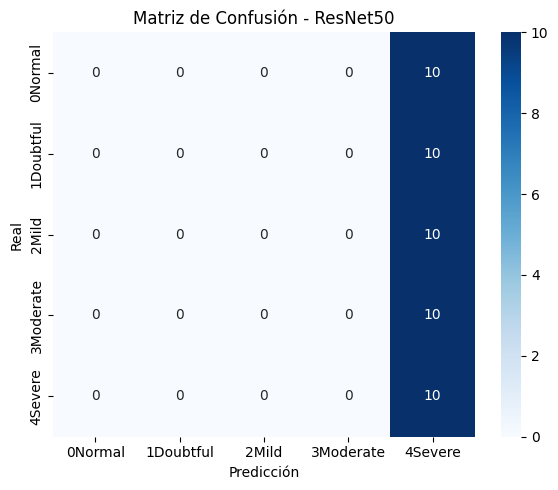

              precision    recall  f1-score   support

     0Normal       0.00      0.00      0.00        10
   1Doubtful       0.00      0.00      0.00        10
       2Mild       0.00      0.00      0.00        10
   3Moderate       0.00      0.00      0.00        10
     4Severe       0.20      1.00      0.33        10

    accuracy                           0.20        50
   macro avg       0.04      0.20      0.07        50
weighted avg       0.04      0.20      0.07        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.2002 - loss: 1.6734 - val_accuracy: 0.2200 - val_loss: 1.6234
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - accuracy: 0.1990 - loss: 1.6748 - val_accuracy: 0.2300 - val_loss: 1.6197
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.1905 - loss: 1.6995 - val_accuracy: 0.2200 - val_loss: 1.6175
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.1789 - loss: 1.7070 - val_accuracy: 0.2400 - val_loss: 1.6168
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.1822 - loss: 1.6783 - val_accuracy: 0.2200 - val_loss: 1.6152
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.1753 - loss: 1.6992 - val_accuracy: 0.2000 - val_loss: 1.6149
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.2423 - loss: 1.6416 - val_accuracy: 0.2000 - val_loss: 1.6144
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.2272 - loss: 1.6320 - val_accuracy: 0.2

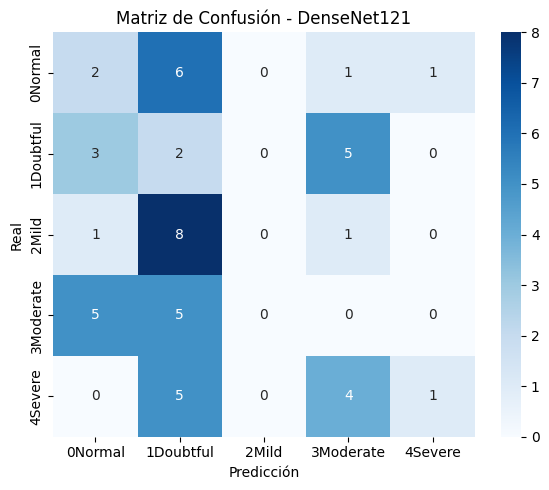

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     0Normal       0.18      0.20      0.19        10
   1Doubtful       0.08      0.20      0.11        10
       2Mild       0.00      0.00      0.00        10
   3Moderate       0.00      0.00      0.00        10
     4Severe       0.50      0.10      0.17        10

    accuracy                           0.10        50
   macro avg       0.15      0.10      0.09        50
weighted avg       0.15      0.10      0.09        50

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1893 - loss: 1.6324 - val_accuracy: 0.2000 - val_loss: 1.6118
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.2205 - loss: 1.6242 - val_accuracy: 0.2000 - val_loss: 1.6130
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2158 - loss: 1.6225 - val_accuracy: 0.2000 - val_loss: 1.6134
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.2121 - loss: 1.6061 - val_accuracy: 0.2000 - val_loss: 1.6113
Epoc

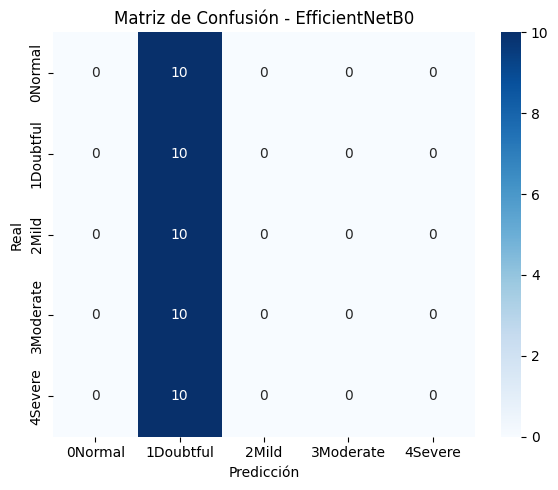

              precision    recall  f1-score   support

     0Normal       0.00      0.00      0.00        10
   1Doubtful       0.20      1.00      0.33        10
       2Mild       0.00      0.00      0.00        10
   3Moderate       0.00      0.00      0.00        10
     4Severe       0.00      0.00      0.00        10

    accuracy                           0.20        50
   macro avg       0.04      0.20      0.07        50
weighted avg       0.04      0.20      0.07        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ResNet50
resnet_model, resnet_hist = entrenar_modelo("ResNet50", ResNet50, X_train_rn, y_train, X_val_rn, y_val)
evaluar_modelo(resnet_model, "ResNet50")

# DenseNet121
densenet_model, densenet_hist = entrenar_modelo("DenseNet121", DenseNet121, X_train_dn, y_train, X_val_dn, y_val)
evaluar_modelo(densenet_model, "DenseNet121")

# EfficientNetB0
efficientnet_model, efficientnet_hist = entrenar_modelo("EfficientNetB0", EfficientNetB0, X_train_en, y_train, X_val_en, y_val)
evaluar_modelo(efficientnet_model, "EfficientNetB0")


# **Conclusiones**
Los modelos no logran clasificar correctamente debido a una pérdida significativa de información contextual en las imágenes de entrada.

La resta Original - Sobel realza bordes pero atenúa estructuras internas de la articulación, como el espacio articular, los osteofitos o la esclerosis, que son clave para el diagnóstico del grado de artritis.

Al eliminar el contenido de intensidad original, los modelos pierden características discriminativas sutiles, haciendo que todas las clases se perciban visualmente similares para la red.

Las matrices de confusión evidencian un sesgo extremo o colapso de decisión.

ResNet50 y EfficientNetB0 colapsan completamente hacia una sola clase, prediciendo siempre "4Severe" o "1Doubtful", lo que indica una falta de capacidad de generalización ante representaciones con bajo contenido de contraste.

DenseNet121 muestra cierto nivel de distinción, aunque sigue confundiendo severamente clases adyacentes (por ejemplo, "Moderate" con "Normal" y "Doubtful"), lo que sugiere que su arquitectura más conectada retiene algo más de información útil, pero aún insuficiente.

El tiempo de entrenamiento es menor debido a la baja complejidad informativa de las imágenes.

Las imágenes procesadas presentan una menor variabilidad intra-clase y un espacio de características más homogéneo, lo cual hace que la red converja rápidamente (aunque de forma errónea).

Al ser imágenes con menos textura y sin color, la cantidad efectiva de patrones que la red puede aprender se reduce, lo que disminuye el tiempo requerido para alcanzar un mínimo local durante la optimización.

# **Modelos entrenados sin/con data augmentation y/o preprocesamiento**


***Cargar imágenes directamente sin preprocesamiento ni augmentar***

In [ ]:
# Cargar imágenes directamente sin normalizar ni augmentar
def load_image(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, IMG_SIZE)
    return img.astype(np.uint8)

# Entrenamiento sin augmentation ni preprocesamiento
X_train_1 = np.array([load_image(fp) for fp in train_df['Filepath']])
y_train_1 = train_df['Encoded_Category'].values

X_val_1 = np.array([load_image(fp) for fp in val_df['Filepath']])
y_val_1 = val_df['Encoded_Category'].values

X_test_1 = np.array([load_image(fp) for fp in test_df['Filepath']])
y_test_1 = test_df['Encoded_Category'].values

print(f"X_train_1: {X_train.shape}, y_train_1: {y_train.shape}")
print(f"X_val_1:   {X_val.shape}, y_val_1:   {y_val.shape}")
print(f"X_test_1:  {X_test.shape}, y_test_1:  {y_test.shape}")


X_train_1: (1155, 224, 224, 3), y_train_1: (1155,)
X_val_1:   (330, 224, 224, 3), y_val_1:   (330,)
X_test_1:  (165, 224, 224, 3), y_test_1:  (165,)


**Cargar imágenes directamente preprocesadas y augmentadas**

In [ ]:
import cv2
import numpy as np
import os
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# =========================
# PARÁMETROS GENERALES
# =========================
IMG_SIZE = (224, 224)
TARGET_PER_CLASS = 800  # Número deseado por clase

# =========================
# 1. FUNCIONES DE UTILIDAD
# =========================
# Carga de imagen cruda sin normalización
def load_image(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, IMG_SIZE)
    return img.astype(np.uint8)

# =========================
# 2. GENERADOR DE AUGMENTATION
# =========================
raw_augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# =========================
# 3. ORGANIZAR DATOS POR CLASE
# =========================
class_to_df = {label: train_df[train_df['Category'] == label] for label in train_df['Category'].unique()}

augmented_images = []
augmented_labels = []

# =========================
# 4. AUMENTAR CLASE POR CLASE
# =========================
for label, subset_df in class_to_df.items():
    imgs = [load_image(fp) for fp in subset_df['Filepath']]
    lbls = [subset_df.iloc[0]['Encoded_Category']] * len(imgs)

    augmented_images.extend(imgs)
    augmented_labels.extend(lbls)

    # Generar imágenes faltantes para llegar a TARGET_PER_CLASS
    needed = TARGET_PER_CLASS - len(imgs)
    if needed > 0:
        gen = raw_augmentor.flow(np.array(imgs), np.array(lbls), batch_size=1, shuffle=False)
        for _ in range(needed):
            aug_img, aug_lbl = next(gen)
            augmented_images.append(aug_img[0].astype(np.uint8))
            augmented_labels.append(int(aug_lbl[0]))

# =========================
# 5. MEZCLAR Y CONVERTIR A ARRAYS
# =========================
X_train_2, y_train_2 = shuffle(
    np.array(augmented_images),
    np.array(augmented_labels),
    random_state=42
)

# =========================
# 6. CARGAR VALIDACIÓN Y TEST SIN PREPROCESAMIENTO NI AUGMENTATION
# =========================
X_val_2 = np.array([load_image(fp) for fp in val_df['Filepath']])
y_val_2 = val_df['Encoded_Category'].values

X_test_2 = np.array([load_image(fp) for fp in test_df['Filepath']])
y_test_2 = test_df['Encoded_Category'].values

# =========================
# 7. VERIFICAR DIMENSIONES
# =========================
print(f"X_train_2: {X_train.shape}, y_train_2: {y_train.shape}")
print(f"X_val_2:   {X_val.shape}, y_val_2:   {y_val.shape}")
print(f"X_test_2:  {X_test.shape}, y_test_2:  {y_test.shape}")


X_train_2: (1155, 224, 224, 3), y_train_2: (1155,)
X_val_2:   (330, 224, 224, 3), y_val_2:   (330,)
X_test_2:  (165, 224, 224, 3), y_test_2:  (165,)


***Cargar imágenes directamente preprocesadas sin augmentar***

In [ ]:
# Reutilizar tu función de preprocesamiento
def load_and_preprocess(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, IMG_SIZE)
    img = img.astype(np.float32)
    return preprocess_input(img)  # Puedes cambiar por la función del modelo: resnet, densenet, etc.

# Entrenamiento sin augmentation pero con preprocesamiento
X_train_3 = np.array([load_and_preprocess(fp) for fp in train_df['Filepath']])
y_train_3 = train_df['Encoded_Category'].values

X_val_3 = np.array([load_and_preprocess(fp) for fp in val_df['Filepath']])
y_val_3 = val_df['Encoded_Category'].values

X_test_3 = np.array([load_and_preprocess(fp) for fp in test_df['Filepath']])
y_test_3 = test_df['Encoded_Category'].values

print(f"X_train_3: {X_train.shape}, y_train_3: {y_train.shape}")
print(f"X_val_3:   {X_val.shape}, y_val_3:   {y_val.shape}")
print(f"X_test_3:  {X_test.shape}, y_test_3:  {y_test.shape}")


X_train_3: (4000, 224, 224, 3), y_train_3: (4000,)
X_val_3:   (330, 224, 224, 3), y_val_3:   (330,)
X_test_3:  (165, 224, 224, 3), y_test_3:  (165,)


***Funcion base para entrenar modelos***

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def entrenar_y_evaluar_modelo(modelo_base, nombre_modelo, X_train, y_train, X_val, y_val, X_test, y_test, preprocess_fn=None):
    """
    Entrena y evalúa un modelo CNN usando una arquitectura base de Keras.
    - modelo_base: clase base (ej. ResNet50)
    - nombre_modelo: string para impresión y títulos
    - preprocess_fn: si es None, no se aplica preprocesamiento
    """
    input_shape = (224, 224, 3)
    base_model = modelo_base(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    # Aplicar preprocesamiento si es necesario
    if preprocess_fn:
        X_train = preprocess_fn(X_train.astype(np.float32))
        X_val = preprocess_fn(X_val.astype(np.float32))
        X_test = preprocess_fn(X_test.astype(np.float32))

    # One-hot encoding de etiquetas
    y_train_cat = to_categorical(y_train, num_classes=5)
    y_val_cat = to_categorical(y_val, num_classes=5)
    y_test_cat = to_categorical(y_test, num_classes=5)

    # Arquitectura del modelo completo
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(5, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    print(f"\n Entrenando {nombre_modelo}...")
    history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=30, batch_size=32, verbose=1)

    # Evaluación
    loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"\n {nombre_modelo} - Accuracy en test: {acc*100:.2f}%")

    # Predicciones y matriz de confusión
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    print(f"\n Reporte de Clasificación - {nombre_modelo}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    return model, history


In [ ]:
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet

**Entrenar los tres modelos sin preprocesamiento y sin data augmentation**


 Entrenando ResNet50 - Sin Preprocesamiento/Sin Aug...
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 347ms/step - accuracy: 0.2946 - loss: 1.8025 - val_accuracy: 0.4333 - val_loss: 1.2898
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.3850 - loss: 1.4390 - val_accuracy: 0.5000 - val_loss: 1.1823
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.4831 - loss: 1.3204 - val_accuracy: 0.5636 - val_loss: 1.1222
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.4929 - loss: 1.2249 - val_accuracy: 0.5606 - val_loss: 1.0777
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.5239 - loss: 1.1540 - val_accuracy: 0.6061 - val_loss: 1.0309
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.5250 - loss: 1.1291 - val_accuracy: 0.6121 - val_loss: 1.0084
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.5473 - loss: 1.1186 - val_accuracy: 0.6000 - val_loss: 0.9833
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/st

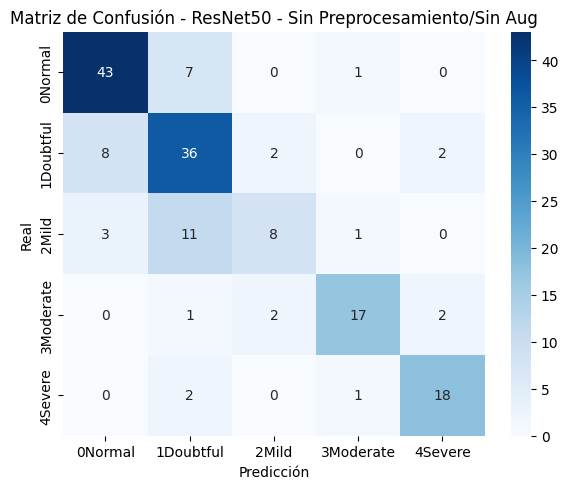


 Reporte de Clasificación - ResNet50 - Sin Preprocesamiento/Sin Aug
              precision    recall  f1-score   support

     0Normal       0.80      0.84      0.82        51
   1Doubtful       0.63      0.75      0.69        48
       2Mild       0.67      0.35      0.46        23
   3Moderate       0.85      0.77      0.81        22
     4Severe       0.82      0.86      0.84        21

    accuracy                           0.74       165
   macro avg       0.75      0.71      0.72       165
weighted avg       0.74      0.74      0.73       165


 Entrenando DenseNet121 - Sin Preprocesamiento/Sin Aug...
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.2288 - loss: 5.9176 - val_accuracy: 0.3303 - val_loss: 1.9262
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 114ms/step - accuracy: 0.2379 - loss: 5.1560 - val_accuracy: 0.3515 - val_loss: 1.8324
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.2856 - loss: 4.1947 - val_accuracy: 0.3788 - val_loss: 1.8880


6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step


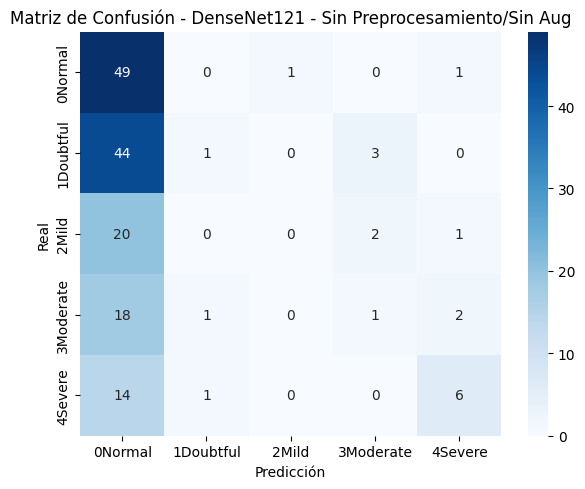


 Reporte de Clasificación - DenseNet121 - Sin Preprocesamiento/Sin Aug
              precision    recall  f1-score   support

     0Normal       0.34      0.96      0.50        51
   1Doubtful       0.33      0.02      0.04        48
       2Mild       0.00      0.00      0.00        23
   3Moderate       0.17      0.05      0.07        22
     4Severe       0.60      0.29      0.39        21

    accuracy                           0.35       165
   macro avg       0.29      0.26      0.20       165
weighted avg       0.30      0.35      0.22       165


 Entrenando EfficientNetB0 - Sin Preprocesamiento/Sin Aug...
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 47s 659ms/step - accuracy: 0.2392 - loss: 1.7632 - val_accuracy: 0.3758 - val_loss: 1.3762
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3445 - loss: 1.4576 - val_accuracy: 0.4788 - val_loss: 1.2535
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4337 - loss: 1.3202 - val_accuracy: 0.5333 - val_loss: 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


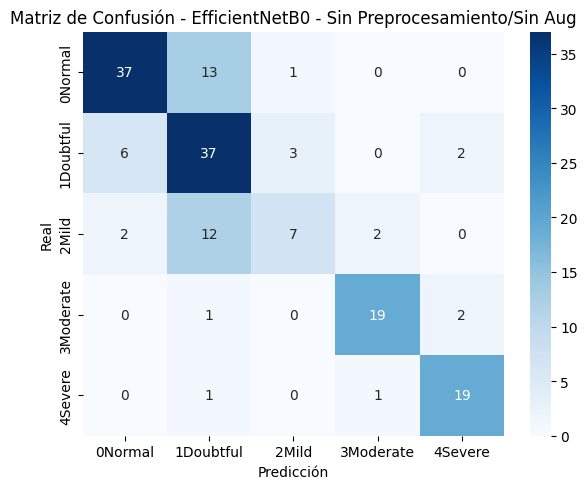


 Reporte de Clasificación - EfficientNetB0 - Sin Preprocesamiento/Sin Aug
              precision    recall  f1-score   support

     0Normal       0.82      0.73      0.77        51
   1Doubtful       0.58      0.77      0.66        48
       2Mild       0.64      0.30      0.41        23
   3Moderate       0.86      0.86      0.86        22
     4Severe       0.83      0.90      0.86        21

    accuracy                           0.72       165
   macro avg       0.75      0.71      0.71       165
weighted avg       0.73      0.72      0.71       165



(<Functional name=functional_3, built=True>,
 <keras.src.callbacks.history.History at 0x7b53865ac090>)

In [ ]:
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet

entrenar_y_evaluar_modelo(ResNet50, "ResNet50 - Sin Preprocesamiento/Sin Aug", X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1, preprocess_fn=None)

entrenar_y_evaluar_modelo(DenseNet121, "DenseNet121 - Sin Preprocesamiento/Sin Aug", X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1, preprocess_fn=None)

entrenar_y_evaluar_modelo(EfficientNetB0, "EfficientNetB0 - Sin Preprocesamiento/Sin Aug", X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1, preprocess_fn=None)


**Entrenar los tres modelos sin preprocesamiento pero con data augmentation**


 Entrenando ResNet50 - Con Aug/Sin Preproc...
Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 129ms/step - accuracy: 0.2867 - loss: 1.8063 - val_accuracy: 0.4848 - val_loss: 1.1882
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.4474 - loss: 1.2959 - val_accuracy: 0.5515 - val_loss: 1.0479
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.4967 - loss: 1.2121 - val_accuracy: 0.6091 - val_loss: 0.9886
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.5359 - loss: 1.1167 - val_accuracy: 0.6364 - val_loss: 0.9281
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.5426 - loss: 1.0865 - val_accuracy: 0.6545 - val_loss: 0.8773
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.5832 - loss: 1.0203 - val_accuracy: 0.6394 - val_loss: 0.8762
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.5775 - loss: 0.9989 - val_accuracy: 0.6727 - val_loss: 0.8343
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21

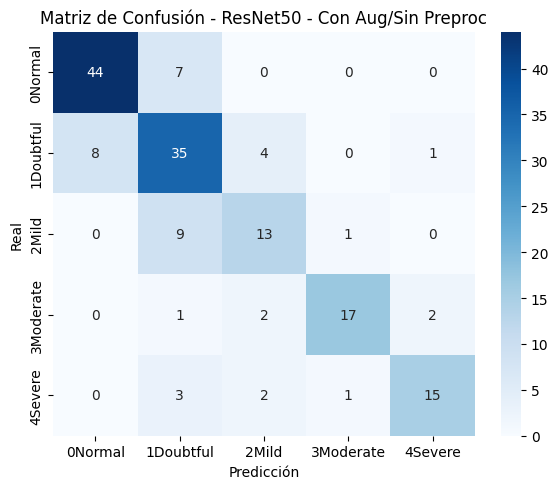


 Reporte de Clasificación - ResNet50 - Con Aug/Sin Preproc
              precision    recall  f1-score   support

     0Normal       0.85      0.86      0.85        51
   1Doubtful       0.64      0.73      0.68        48
       2Mild       0.62      0.57      0.59        23
   3Moderate       0.89      0.77      0.83        22
     4Severe       0.83      0.71      0.77        21

    accuracy                           0.75       165
   macro avg       0.77      0.73      0.74       165
weighted avg       0.76      0.75      0.75       165


 Entrenando DenseNet121 - Con Aug/Sin Preproc...
Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 48s 197ms/step - accuracy: 0.2169 - loss: 5.5896 - val_accuracy: 0.3061 - val_loss: 1.7507
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.2428 - loss: 3.3396 - val_accuracy: 0.3515 - val_loss: 1.5107
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.2553 - loss: 2.4903 - val_accuracy: 0.3303 - val_loss: 1.5151
Epoch 4/30
1

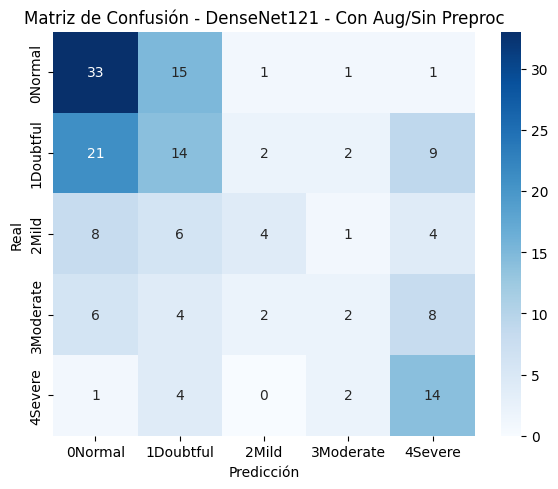


 Reporte de Clasificación - DenseNet121 - Con Aug/Sin Preproc
              precision    recall  f1-score   support

     0Normal       0.48      0.65      0.55        51
   1Doubtful       0.33      0.29      0.31        48
       2Mild       0.44      0.17      0.25        23
   3Moderate       0.25      0.09      0.13        22
     4Severe       0.39      0.67      0.49        21

    accuracy                           0.41       165
   macro avg       0.38      0.37      0.35       165
weighted avg       0.39      0.41      0.37       165


 Entrenando EfficientNetB0 - Con Aug/Sin Preproc...
Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.3065 - loss: 1.5441 - val_accuracy: 0.5212 - val_loss: 1.1821
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4687 - loss: 1.2705 - val_accuracy: 0.5879 - val_loss: 1.0649
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.5058 - loss: 1.1771 - val_accuracy: 0.6273 - val_loss: 0.9924
Epoch

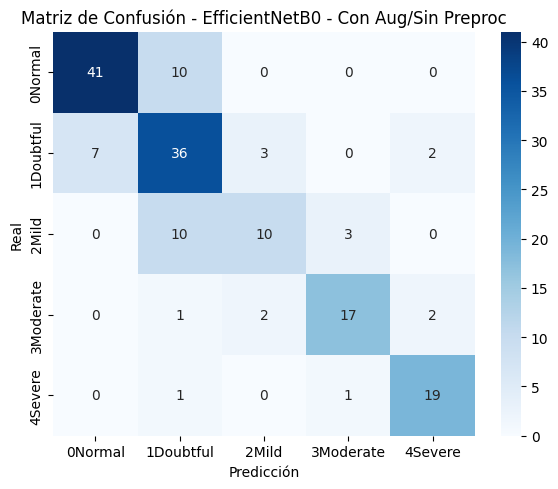


 Reporte de Clasificación - EfficientNetB0 - Con Aug/Sin Preproc
              precision    recall  f1-score   support

     0Normal       0.85      0.80      0.83        51
   1Doubtful       0.62      0.75      0.68        48
       2Mild       0.67      0.43      0.53        23
   3Moderate       0.81      0.77      0.79        22
     4Severe       0.83      0.90      0.86        21

    accuracy                           0.75       165
   macro avg       0.76      0.73      0.74       165
weighted avg       0.75      0.75      0.74       165



(<Functional name=functional_6, built=True>,
 <keras.src.callbacks.history.History at 0x7b531049f8d0>)

In [ ]:
entrenar_y_evaluar_modelo(ResNet50, "ResNet50 - Con Aug/Sin Preproc", X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2, preprocess_fn=None)

entrenar_y_evaluar_modelo(DenseNet121, "DenseNet121 - Con Aug/Sin Preproc", X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2, preprocess_fn=None)

entrenar_y_evaluar_modelo(EfficientNetB0, "EfficientNetB0 - Con Aug/Sin Preproc", X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2, preprocess_fn=None)


**Entrenar los tres modelos con preprocesamiento pero sin data augmentation**


 Entrenando ResNet50 - Con Preproc/Sin Aug...
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 641ms/step - accuracy: 0.2496 - loss: 2.0834 - val_accuracy: 0.4606 - val_loss: 1.3130
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.4077 - loss: 1.5093 - val_accuracy: 0.5242 - val_loss: 1.1305
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.4346 - loss: 1.3538 - val_accuracy: 0.5667 - val_loss: 1.0667
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.5153 - loss: 1.2103 - val_accuracy: 0.5879 - val_loss: 1.0013
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.5230 - loss: 1.1455 - val_accuracy: 0.6424 - val_loss: 0.9658
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.5307 - loss: 1.1097 - val_accuracy: 0.6333 - val_loss: 0.9293
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.5640 - loss: 1.0628 - val_accuracy: 0.6515 - val_loss: 0.9184
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - a

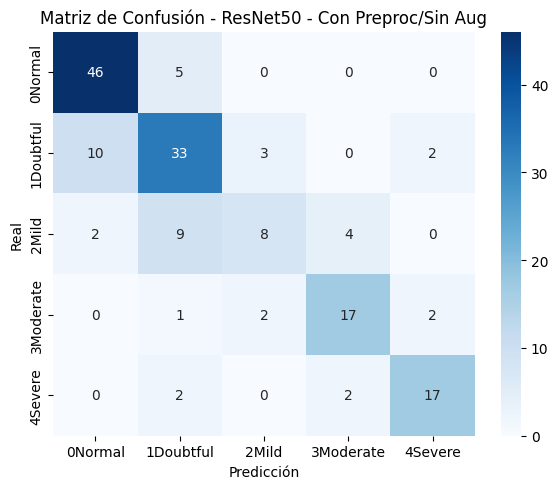


 Reporte de Clasificación - ResNet50 - Con Preproc/Sin Aug
              precision    recall  f1-score   support

     0Normal       0.79      0.90      0.84        51
   1Doubtful       0.66      0.69      0.67        48
       2Mild       0.62      0.35      0.44        23
   3Moderate       0.74      0.77      0.76        22
     4Severe       0.81      0.81      0.81        21

    accuracy                           0.73       165
   macro avg       0.72      0.70      0.71       165
weighted avg       0.72      0.73      0.72       165


 Entrenando DenseNet121 - Con Preproc/Sin Aug...
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.2939 - loss: 2.0313 - val_accuracy: 0.4000 - val_loss: 1.4662
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 111ms/step - accuracy: 0.3147 - loss: 1.7285 - val_accuracy: 0.4182 - val_loss: 1.3725
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.3535 - loss: 1.5508 - val_accuracy: 0.4667 - val_loss: 1.3253
Epoch 4/30
37/37 ━━

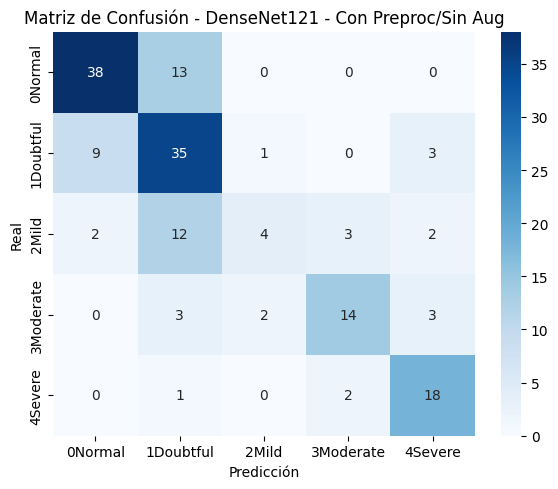


 Reporte de Clasificación - DenseNet121 - Con Preproc/Sin Aug
              precision    recall  f1-score   support

     0Normal       0.78      0.75      0.76        51
   1Doubtful       0.55      0.73      0.62        48
       2Mild       0.57      0.17      0.27        23
   3Moderate       0.74      0.64      0.68        22
     4Severe       0.69      0.86      0.77        21

    accuracy                           0.66       165
   macro avg       0.66      0.63      0.62       165
weighted avg       0.66      0.66      0.64       165


 Entrenando EfficientNetB0 - Con Preproc/Sin Aug...
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 49s 685ms/step - accuracy: 0.2452 - loss: 1.6429 - val_accuracy: 0.4091 - val_loss: 1.3829
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.3908 - loss: 1.4246 - val_accuracy: 0.4758 - val_loss: 1.2691
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4763 - loss: 1.2764 - val_accuracy: 0.5242 - val_loss: 1.1927
Epoch 4/30
3

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


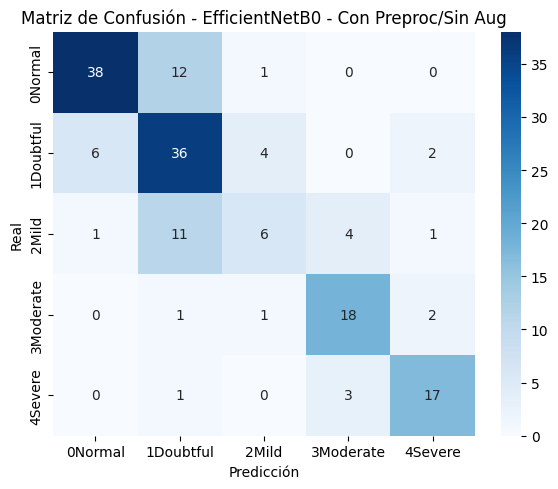


 Reporte de Clasificación - EfficientNetB0 - Con Preproc/Sin Aug
              precision    recall  f1-score   support

     0Normal       0.84      0.75      0.79        51
   1Doubtful       0.59      0.75      0.66        48
       2Mild       0.50      0.26      0.34        23
   3Moderate       0.72      0.82      0.77        22
     4Severe       0.77      0.81      0.79        21

    accuracy                           0.70       165
   macro avg       0.69      0.68      0.67       165
weighted avg       0.70      0.70      0.69       165



(<Functional name=functional_2, built=True>,
 <keras.src.callbacks.history.History at 0x791fe06fea10>)

In [ ]:
entrenar_y_evaluar_modelo(ResNet50, "ResNet50 - Con Preproc/Sin Aug", X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3, preprocess_fn=preprocess_resnet)

entrenar_y_evaluar_modelo(DenseNet121, "DenseNet121 - Con Preproc/Sin Aug", X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3, preprocess_fn=preprocess_densenet)

entrenar_y_evaluar_modelo(EfficientNetB0, "EfficientNetB0 - Con Preproc/Sin Aug", X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3, preprocess_fn=preprocess_efficientnet)
